In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### データ読み込み

In [2]:
train_kaggle = pd.read_csv('train_kaggle.csv')
train_kaggle.datetime = pd.to_datetime(train_kaggle.datetime)
train_kaggle.datetime.min(), train_kaggle.datetime.max()

(Timestamp('2017-06-09 00:00:00'), Timestamp('2018-09-30 00:00:00'))

### 目的変数をドルに変換

In [3]:
minimum_unit = train_kaggle.operation_value.abs().min()
train_kaggle['target'] = (train_kaggle.operation_value / minimum_unit).astype(int)
train_kaggle.head()

,datetime,atm_id,operation_type,client_id,operation_value,target
0,2017-08-05,85,0,20338,-0.294181,-19
1,2017-08-17,85,0,36294,4.412712,299
2,2017-08-22,85,0,45261,2.441701,165
3,2017-08-23,85,0,46317,-29.418080,-1999
4,2017-08-24,85,0,47522,2.941808,199


In [4]:
minimum_unit

0.0147090402

### ヒストグラム

119.44834847292755 -19999 19999


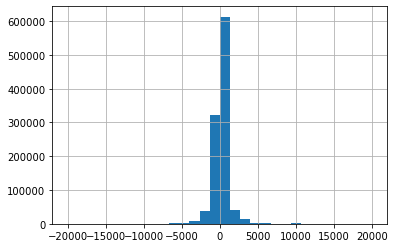

In [5]:
print(train_kaggle.target.mean(),train_kaggle.target.min(),train_kaggle.target.max(),)
train_kaggle.target.hist(bins=30);

In [64]:
by_atm = {}
for atm_id in train_kaggle.atm_id.unique():
    by_target = atm_id == train_kaggle.atm_id 
    byatm = train_kaggle[by_target].reset_index(drop=True) 
    by_atm[atm_id] = byatm

### ヒートマップ

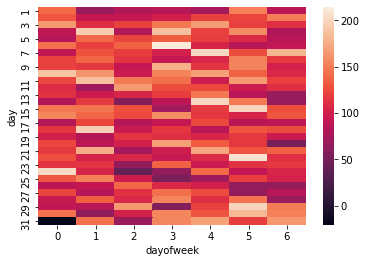

In [6]:
train_kaggle['dayofweek'] = train_kaggle.datetime.dt.dayofweek
train_kaggle['day'] = train_kaggle.datetime.dt.day
train_kaggle['month'] = train_kaggle.datetime.dt.month
train_kaggle['week'] = train_kaggle.datetime.dt.week
sns.heatmap(train_kaggle.pivot_table(index='day', columns='dayofweek', values='target'));

### ATM別のデータ件数

20


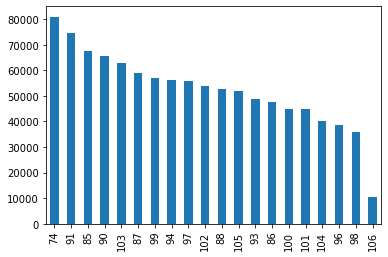

In [7]:
print(len(train_kaggle.atm_id.unique()))
train_kaggle.atm_id.value_counts().plot(kind='bar');

### 前処理

In [8]:
data_preprocessed = train_kaggle.pivot_table(
    index=['datetime', 'atm_id', 'month', 'week', 'dayofweek', 'day'], 
    values='target',
    aggfunc='sum').reset_index();

In [9]:
data_preprocessed['month*2'] = data_preprocessed['month'] ** 2
data_preprocessed['month*3'] = data_preprocessed['month'] ** 3
data_preprocessed['month*4'] = data_preprocessed['month'] ** 4
data_preprocessed['week*2'] = data_preprocessed['week'] ** 2
data_preprocessed['week*3'] = data_preprocessed['week'] ** 3
data_preprocessed['week*4'] = data_preprocessed['week'] ** 4
print(data_preprocessed.shape)
data_preprocessed.head()

(8352, 13)


,datetime,atm_id,month,week,dayofweek,day,target,month*2,month*3,month*4,week*2,week*3,week*4
0,2017-06-09,87,6,23,4,9,41,36,216,1296,529,12167,279841
1,2017-06-10,87,6,23,5,10,99,36,216,1296,529,12167,279841
2,2017-06-11,87,6,23,6,11,-15,36,216,1296,529,12167,279841
3,2017-06-12,87,6,24,0,12,-901,36,216,1296,576,13824,331776
4,2017-06-13,87,6,24,1,13,492,36,216,1296,576,13824,331776


In [10]:
data_preprocessed = pd.get_dummies(data_preprocessed, columns=['dayofweek'], drop_first=True)

In [11]:
#給料日の特徴量を追加

data_preprocessed['salary10th']=train_kaggle['day'].replace({10: 1, 1: 0, 2: 0, 3: 0, 4: 0
                                                   , 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 11: 0
                                                   , 12: 0, 13: 0, 14: 0, 15: 0, 16: 0
                                                   , 17: 0, 18: 0, 19: 0, 20: 0, 21: 0
                                                   , 22: 0, 23: 0, 24: 0, 25: 0, 26: 0
                                                   , 27: 0, 28: 0, 29: 0, 30: 0, 31: 0})

data_preprocessed['salary25th']=train_kaggle['day'].replace({25: 1, 1: 0, 2: 0, 3: 0, 4: 0
                                                   , 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 11: 0
                                                   , 12: 0, 13: 0, 14: 0, 15: 0, 16: 0
                                                   , 17: 0, 18: 0, 19: 0, 20: 0, 21: 0
                                                   , 22: 0, 23: 0, 24: 0, 10: 0, 26: 0
                                                   , 27: 0, 28: 0, 29: 0, 30: 0, 31: 0})
data_preprocessed.head()

,datetime,atm_id,month,week,day,target,month*2,month*3,month*4,week*2,week*3,week*4,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,salary10th,salary25th
0,2017-06-09,87,6,23,9,41,36,216,1296,529,12167,279841,0,0,0,1,0,0,0,0
1,2017-06-10,87,6,23,10,99,36,216,1296,529,12167,279841,0,0,0,0,1,0,0,0
2,2017-06-11,87,6,23,11,-15,36,216,1296,529,12167,279841,0,0,0,0,0,1,0,0
3,2017-06-12,87,6,24,12,-901,36,216,1296,576,13824,331776,0,0,0,0,0,0,0,0
4,2017-06-13,87,6,24,13,492,36,216,1296,576,13824,331776,1,0,0,0,0,0,0,0


In [82]:
dailydata = pd.read_csv('daily_data.csv', encoding='shift_jis')
dailydata.datetime = pd.to_datetime(dailydata.datetime)
dailydata

,datetime,年,月,日,日平均気温(℃),日最高気温(℃),日最低気温(℃),日降水量(mm)
0,2017-06-01,2017,6,1,10.0,14.6,5.6,NaN
1,2017-06-02,2017,6,2,17.2,23.9,8.5,NaN
2,2017-06-03,2017,6,3,19.7,26.1,12.1,NaN
3,2017-06-04,2017,6,4,19.0,25.1,15.2,NaN
4,2017-06-05,2017,6,5,12.3,13.4,13.0,NaN
...,...,...,...,...,...,...,...,...
483,2018-09-26,2018,9,26,8.2,12.2,3.4,NaN
484,2018-09-27,2018,9,27,7.9,13.1,5.0,NaN
485,2018-09-28,2018,9,28,9.4,14.6,7.2,NaN
486,2018-09-29,2018,9,29,5.9,8.8,4.4,NaN


In [83]:
dailydata = dailydata.drop('年',axis=1)
dailydata = dailydata.drop('月',axis=1)
dailydata = dailydata.drop('日',axis=1)
dailydata['average_temp(℃)'] = dailydata['日平均気温(℃)'].astype(int)
dailydata['max_temp(℃)'] = dailydata['日最高気温(℃)'].astype(int)
dailydata['min_temp(℃)'] = dailydata['日最低気温(℃)'].astype(int)
dailydata['日降水量(mm)'].fillna(0, inplace=True)
dailydata['precipitation(mm)'] = dailydata['日降水量(mm)'].astype(int)
dailydata.dtypes

datetime             datetime64[ns]
日平均気温(℃)                    float64
日最高気温(℃)                    float64
日最低気温(℃)                    float64
日降水量(mm)                    float64
average_temp(℃)               int64
max_temp(℃)                   int64
min_temp(℃)                   int64
precipitation(mm)             int64
dtype: object

In [ ]:
data_preprocessed = data_preprocessed.merge(dailydata, on='datetime', how='left')
data_preprocessed

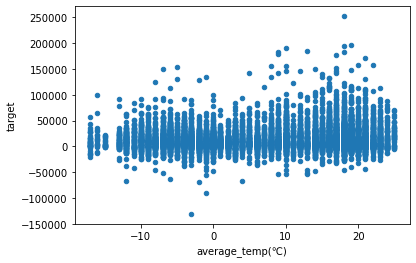

In [85]:
data_preprocessed.plot(kind='scatter', x='average_temp(℃)', y='target')

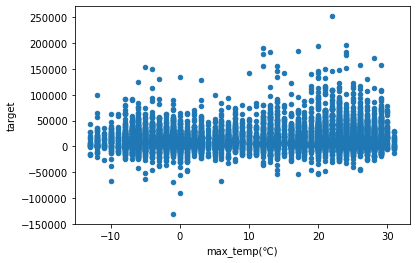

In [86]:
data_preprocessed.plot(kind='scatter', x='max_temp(℃)', y='target')

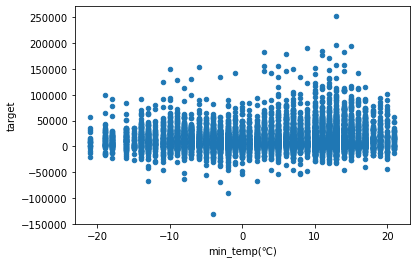

In [87]:
data_preprocessed.plot(kind='scatter', x='min_temp(℃)', y='target')

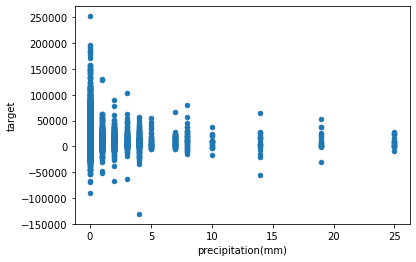

In [88]:
data_preprocessed.plot(kind='scatter', x='precipitation(mm)', y='target')

In [16]:
target_col = 'target'
exclude_cols = ['target', 'datetime', 'client_id', 'operation_value', 'atm_id', 'operation_type']
feature_cols = [col for col in data_preprocessed.columns if col not in exclude_cols]
feature_cols

['month',
 'week',
 'day',
 'month*2',
 'month*3',
 'month*4',
 'week*2',
 'week*3',
 'week*4',
 'dayofweek_1',
 'dayofweek_2',
 'dayofweek_3',
 'dayofweek_4',
 'dayofweek_5',
 'dayofweek_6',
 'salary10th',
 'salary25th',
 '日平均気温(℃)',
 '日最高気温(℃)',
 '日最低気温(℃)',
 '日降水量(mm)']

In [17]:
from sklearn.preprocessing import StandardScaler

# 標準化を行う
scaler = StandardScaler()
X = scaler.fit_transform(data_preprocessed[feature_cols])
for i, col in enumerate(feature_cols):
    data_preprocessed[col] = X[:, i]

In [18]:
data_preprocessed

,datetime,atm_id,month,week,day,target,month*2,month*3,month*4,week*2,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,salary10th,salary25th,日平均気温(℃),日最高気温(℃),日最低気温(℃),日降水量(mm)
0,2017-06-09,87,-0.239632,-0.327289,-0.778175,41,-0.478324,-0.594627,-0.627865,-0.569437,...,-0.407482,2.439831,-0.408277,-0.411054,-0.187496,-0.196831,0.190584,0.168924,0.206873,-0.241353
1,2017-06-10,87,-0.239632,-0.327289,-0.664744,99,-0.478324,-0.594627,-0.627865,-0.569437,...,-0.407482,-0.409864,2.449319,-0.411054,-0.187496,-0.196831,0.190584,0.088273,0.206873,-0.241353
2,2017-06-11,87,-0.239632,-0.327289,-0.551313,-15,-0.478324,-0.594627,-0.627865,-0.569437,...,-0.407482,-0.409864,-0.408277,2.432773,-0.187496,-0.196831,0.560447,0.733482,0.517554,-0.241353
3,2017-06-12,87,-0.239632,-0.257183,-0.437882,-901,-0.478324,-0.594627,-0.627865,-0.508612,...,-0.407482,-0.409864,-0.408277,-0.411054,-0.187496,-0.196831,0.745378,1.056086,0.828234,-0.241353
4,2017-06-13,87,-0.239632,-0.257183,-0.324451,492,-0.478324,-0.594627,-0.627865,-0.508612,...,-0.407482,-0.409864,-0.408277,-0.411054,-0.187496,-0.196831,0.745378,0.652831,0.931794,-0.241353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,2018-09-30,102,0.675981,0.794405,1.603875,15721,0.557821,0.397283,0.238992,0.714352,...,-0.407482,-0.409864,-0.408277,2.432773,-0.187496,-0.196831,-0.179278,-0.073029,-0.414487,-0.241353
8388,2018-09-30,103,0.675981,0.794405,1.603875,48731,0.557821,0.397283,0.238992,0.714352,...,-0.407482,-0.409864,-0.408277,2.432773,-0.187496,-0.196831,-0.179278,-0.073029,-0.414487,-0.241353
8389,2018-09-30,104,0.675981,0.794405,1.603875,23458,0.557821,0.397283,0.238992,0.714352,...,-0.407482,-0.409864,-0.408277,2.432773,-0.187496,-0.196831,-0.179278,-0.073029,-0.414487,-0.241353
8390,2018-09-30,105,0.675981,0.794405,1.603875,-14177,0.557821,0.397283,0.238992,0.714352,...,-0.407482,-0.409864,-0.408277,2.432773,-0.187496,-0.196831,-0.179278,-0.073029,-0.414487,-0.241353


In [19]:
dataset_by_atm = {}
for atm_id in data_preprocessed.atm_id.unique():
    is_target = atm_id == data_preprocessed.atm_id 
    is_notnull = ~data_preprocessed['日平均気温(℃)'].isnull()
    data_by_atm = data_preprocessed[(is_target)&(is_notnull)].reset_index(drop=True)
    dataset_by_atm[atm_id] = data_by_atm

In [20]:
data_by_atm.columns

Index(['datetime', 'atm_id', 'month', 'week', 'day', 'target', 'month*2',
       'month*3', 'month*4', 'week*2', 'week*3', 'week*4', 'dayofweek_1',
       'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5',
       'dayofweek_6', 'salary10th', 'salary25th', '日平均気温(℃)', '日最高気温(℃)',
       '日最低気温(℃)', '日降水量(mm)'],
      dtype='object')

In [21]:
dataset_by_atm

{87:       datetime  atm_id     month      week       day  target   month*2  \
 0   2017-06-09      87 -0.239632 -0.327289 -0.778175      41 -0.478324   
 1   2017-06-10      87 -0.239632 -0.327289 -0.664744      99 -0.478324   
 2   2017-06-11      87 -0.239632 -0.327289 -0.551313     -15 -0.478324   
 3   2017-06-12      87 -0.239632 -0.257183 -0.437882    -901 -0.478324   
 4   2017-06-13      87 -0.239632 -0.257183 -0.324451     492 -0.478324   
 ..         ...     ...       ...       ...       ...     ...       ...   
 455 2018-09-23      87  0.675981  0.724299  0.809858   20260  0.557821   
 456 2018-09-24      87  0.675981  0.794405  0.923289   14999  0.557821   
 457 2018-09-28      87  0.675981  0.794405  1.377013   19891  0.557821   
 458 2018-09-29      87  0.675981  0.794405  1.490444   15683  0.557821   
 459 2018-09-30      87  0.675981  0.794405  1.603875    7356  0.557821   
 
       month*3   month*4    week*2  ...  dayofweek_3  dayofweek_4  dayofweek_5  \
 0   -0.5946

In [22]:
from datetime import datetime as dt
ratio_date = '2018-08-01 00:00:00'
ratio_date = dt.strptime(ratio_date, '%Y-%m-%d %H:%M:%S')
ratio_date

datetime.datetime(2018, 8, 1, 0, 0)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [24]:
from  datetime import timedelta
train_start_date = ratio_date - timedelta(days=243)
train_start_date

datetime.datetime(2017, 12, 1, 0, 0)

### 線形回帰

In [25]:
# 線形回帰

score_by_atm = {}
predict_by_atm = {}
target_by_atm = {}
date_by_atm = {}
models = {}


for atm_id in dataset_by_atm.keys():
    
    target_data = dataset_by_atm[atm_id]
    is_test = target_data.datetime >= ratio_date
    test = target_data[is_test].sort_values(by='datetime')
    is_train_start = target_data.datetime >= train_start_date
    train = target_data[(~is_test) & (is_train_start)]
    
    if len(test) == 0:
        print(atm_id)
        break

    test_X = test[feature_cols]
    train_X = train[feature_cols]

    test_y = test[target_col]
    train_y = train[target_col]

    lr = LinearRegression()
    lr.fit(train_X, train_y)
    pred = lr.predict(test_X)
    mse = mean_squared_error(pred, test_y)
    rmse = np.sqrt(mse)

    models[atm_id] = *lr.coef_, lr.intercept_
    score_by_atm[atm_id] = rmse
    predict_by_atm[atm_id] = pred
    target_by_atm[atm_id] = test_y
    date_by_atm[atm_id] = test.datetime

24836.03494218564

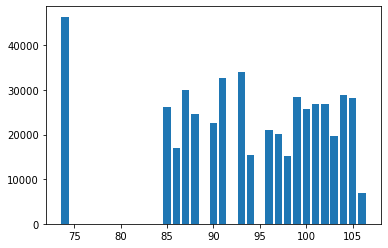

In [27]:
# 線形回帰
plt.bar(score_by_atm.keys(), list(score_by_atm.values()));
np.mean(list(score_by_atm.values()))

In [28]:
score_by_atm.values()

dict_values([29979.14415019181, 32683.930939780494, 22487.783771556424, 21034.956191453042, 28132.424751835497, 16904.64837237702, 26900.052193254796, 26127.525862429102, 28929.831575891756, 19725.520591036577, 6968.912100671309, 15396.221999391077, 25823.386058850483, 26842.557463597223, 33974.596103811644, 24610.068914767275, 46406.713657869404, 20218.662000851902, 28441.776987671823, 15131.985156424214])

In [29]:
score_by_atm.keys()

dict_keys([87, 91, 90, 96, 105, 86, 102, 85, 104, 103, 106, 94, 100, 101, 93, 88, 74, 97, 99, 98])

46406.713657869404


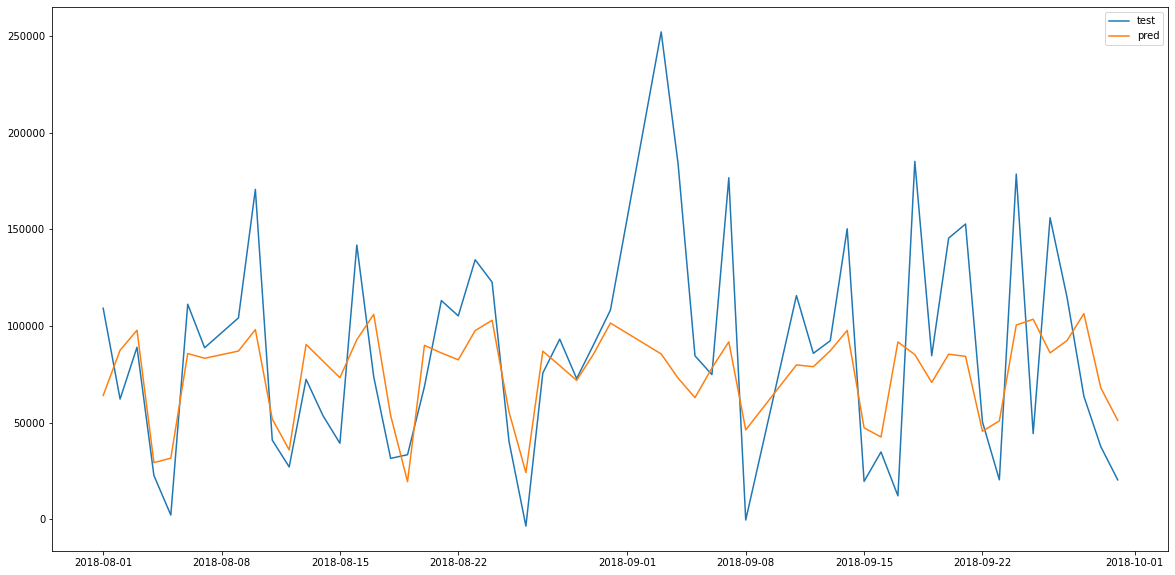

In [30]:
# 線形回帰
atm_id = 74
print(score_by_atm[atm_id])
plt.figure(figsize=(20, 10))
plt.plot(date_by_atm[atm_id], target_by_atm[atm_id], label='test')
plt.plot(date_by_atm[atm_id], predict_by_atm[atm_id], label='pred')
plt.legend();

29979.14415019181


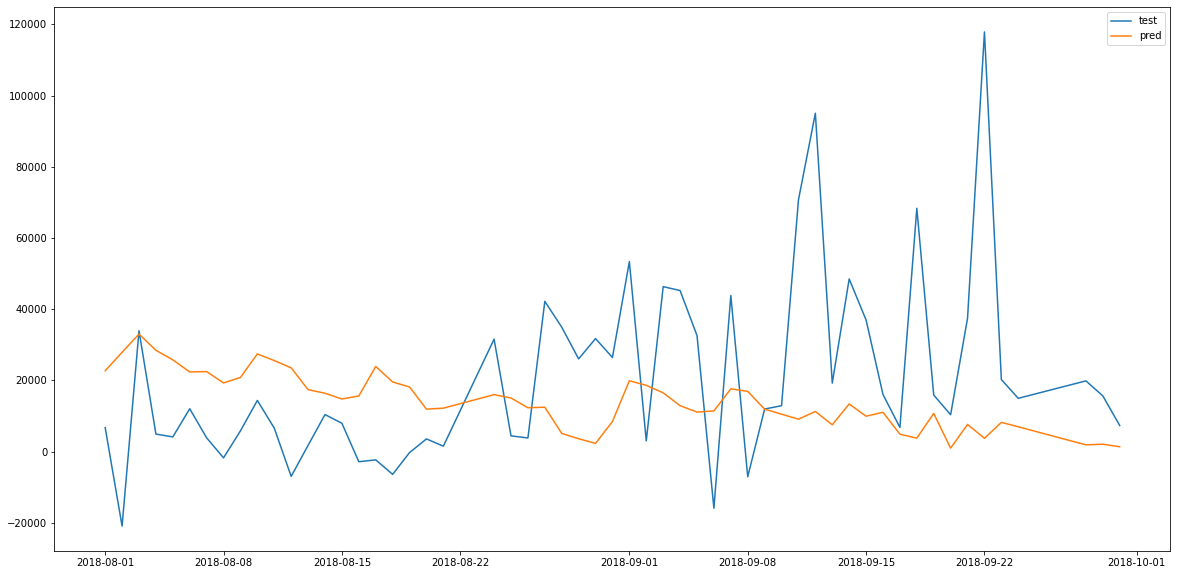

In [31]:
# 線形回帰
atm_id = 87
print(score_by_atm[atm_id])
plt.figure(figsize=(20, 10))
plt.plot(date_by_atm[atm_id], target_by_atm[atm_id], label='test')
plt.plot(date_by_atm[atm_id], predict_by_atm[atm_id], label='pred')
plt.legend();

### リッジ回帰

In [32]:
# リッジ回帰

score_by_atm = {}
predict_by_atm = {}
target_by_atm = {}
date_by_atm = {}
models = {}


for atm_id in dataset_by_atm.keys():
    
    target_data = dataset_by_atm[atm_id]
    is_test = target_data.datetime >= ratio_date
    test = target_data[is_test].sort_values(by='datetime')
    is_train_start = target_data.datetime >= train_start_date
    train = target_data[(~is_test) & (is_train_start)]
    
    if len(test) == 0:
        print(atm_id)
        break

    test_X = test[feature_cols]
    train_X = train[feature_cols]

    test_y = test[target_col]
    train_y = train[target_col]

    ridge = Ridge(alpha=5)
    ridge.fit(train_X, train_y)
    pred = ridge.predict(test_X)
    mse = mean_squared_error(pred, test_y)
    rmse = np.sqrt(mse)

    models[atm_id] = *ridge.coef_, ridge.intercept_
    score_by_atm[atm_id] = rmse
    predict_by_atm[atm_id] = pred
    target_by_atm[atm_id] = test_y
    date_by_atm[atm_id] = test.datetime

In [47]:
#　特徴量ごとの回帰係数＋切片
columns = *feature_cols, 'intercept'
coef_matrix = pd.DataFrame(models, index=columns).T
coef_matrix

,month,week,day,month*2,month*3,month*4,week*2,week*3,week*4,dayofweek_1,...,dayofweek_4,dayofweek_5,dayofweek_6,salary10th,salary25th,日平均気温(℃),日最高気温(℃),日最低気温(℃),日降水量(mm),intercept
87,309.123369,549.087533,-232.908808,380.270508,-2450.899169,-4720.585614,1887.007827,2092.853586,4013.210647,51.842956,...,1388.867730,647.033173,162.877985,1722.641722,894.102133,5141.654143,-1063.785999,536.062007,522.542679,21593.092762
91,232.363401,134.142161,463.593967,-414.195737,1820.154579,4694.992154,-4262.151870,-3829.275312,-1748.046853,-1514.812745,...,-3494.470903,1164.341582,459.294348,3219.472834,1660.206294,6863.652120,-1306.246394,-3963.690455,-2384.305018,12881.380721
90,2292.721953,2585.043764,-1327.205577,-281.398274,-3934.872923,-7356.628111,3600.167127,2466.546338,1241.755476,-1856.221082,...,276.813967,-732.599096,-2772.069703,819.776338,837.849862,4462.781421,-5931.441809,-508.283676,-395.477994,16768.377022
96,1736.635579,1621.369714,-289.193077,103.563957,-1574.740547,-3118.447678,781.762626,123.602112,71.745301,-311.955285,...,408.016499,-696.563674,-2303.119293,160.813472,-210.661223,2296.713562,-886.570993,-1869.098612,-874.549752,12442.993119
105,4276.570325,4643.207904,97.739456,-502.024196,-3306.490119,-5477.814385,525.667918,678.438865,1861.326898,1219.201216,...,2140.368415,-4227.065783,-3035.357932,3221.941479,-66.119871,2239.111951,-1127.540233,-988.504136,-790.089965,19583.550014
86,2036.326044,1474.029653,-463.375780,-1456.961385,-2488.862102,-2909.849048,333.434222,1342.283702,2681.450828,-1394.235618,...,-181.105968,-3048.875787,-2972.720279,119.372774,1665.776953,1066.558429,-749.313502,-1072.649813,-682.712868,10924.855213
102,6696.235469,6047.456480,-1659.314507,-1362.532764,-2903.592388,-2422.579668,-2786.902766,-2718.323001,-405.576236,296.710844,...,-916.885187,2678.811533,-175.555367,37.062314,2671.172348,-1203.231865,-1141.524118,1365.452121,-700.648756,19161.067465
85,8325.197559,9033.654972,-373.051245,-938.373223,-8511.337644,-14060.955334,5269.503883,3042.889425,2595.152796,-374.919153,...,1908.295696,-7065.437631,-7892.001018,-1205.425309,1679.152903,254.916342,-1462.631320,-346.183583,895.331591,30365.714400
104,3240.326626,3563.747967,709.741971,1489.538595,-1437.643082,-3683.448907,3234.812405,-932.387050,-4305.841375,-233.826471,...,1385.729996,297.404831,-1824.173193,1620.824579,-172.315795,4985.241766,-1859.148125,-1500.313026,-1313.040154,18954.570409
103,3026.724402,3208.091073,-511.021349,1833.859766,-3467.137721,-8610.003371,4226.803417,1710.050050,-507.088824,-1262.847921,...,714.215866,1877.013043,-2890.581535,-677.670218,-461.746084,-2588.889663,-1392.315142,5531.615311,-18.436679,20511.615866


23637.078868322053

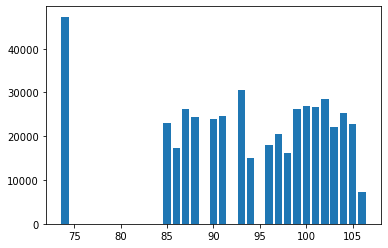

In [48]:
#　リッジ回帰

plt.bar(score_by_atm.keys(), list(score_by_atm.values()));
np.mean(list(score_by_atm.values()))

In [50]:
score_by_atm.values()

dict_values([26226.456753130995, 24525.044104480447, 24009.881660979754, 17910.379959022466, 22742.925168691363, 17362.44849221996, 28483.2141502863, 22969.781697223712, 25286.962160397146, 22062.308045142585, 7225.9342755368625, 14937.992296728107, 26866.679245178115, 26719.07710644389, 30655.826375652243, 24493.378410914152, 47308.5132478313, 20520.722565748667, 26248.48332456637, 16185.568326266548])

In [51]:
score_by_atm.keys()

dict_keys([87, 91, 90, 96, 105, 86, 102, 85, 104, 103, 106, 94, 100, 101, 93, 88, 74, 97, 99, 98])

47308.5132478313


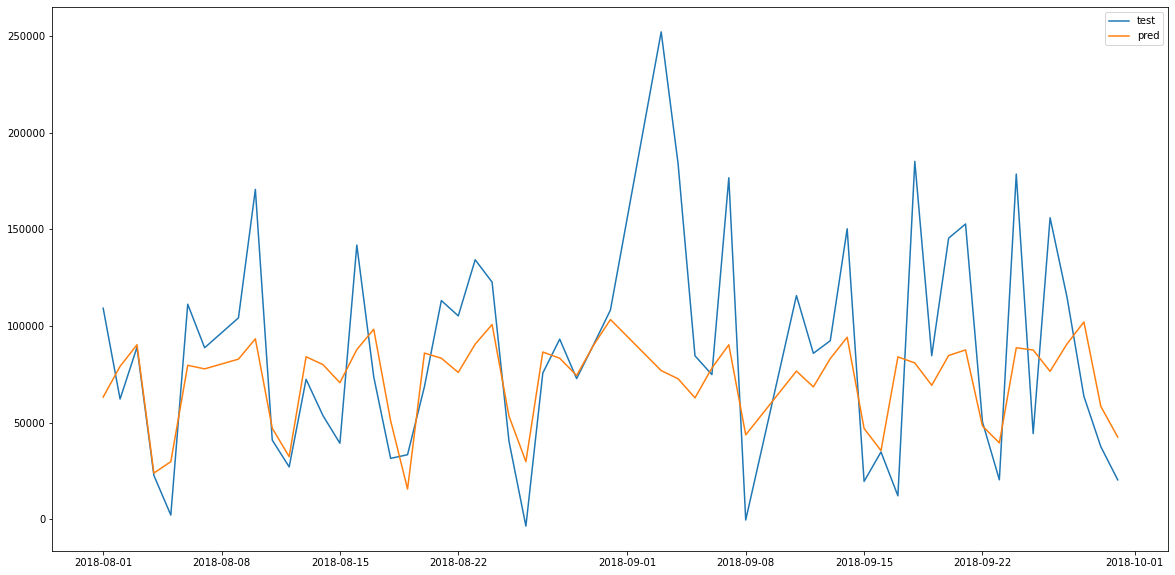

In [52]:
#　リッジ回帰
atm_id = 74
print(score_by_atm[atm_id])
plt.figure(figsize=(20, 10))
plt.plot(date_by_atm[atm_id], target_by_atm[atm_id], label='test')
plt.plot(date_by_atm[atm_id], predict_by_atm[atm_id], label='pred')
plt.legend();

26226.456753130995


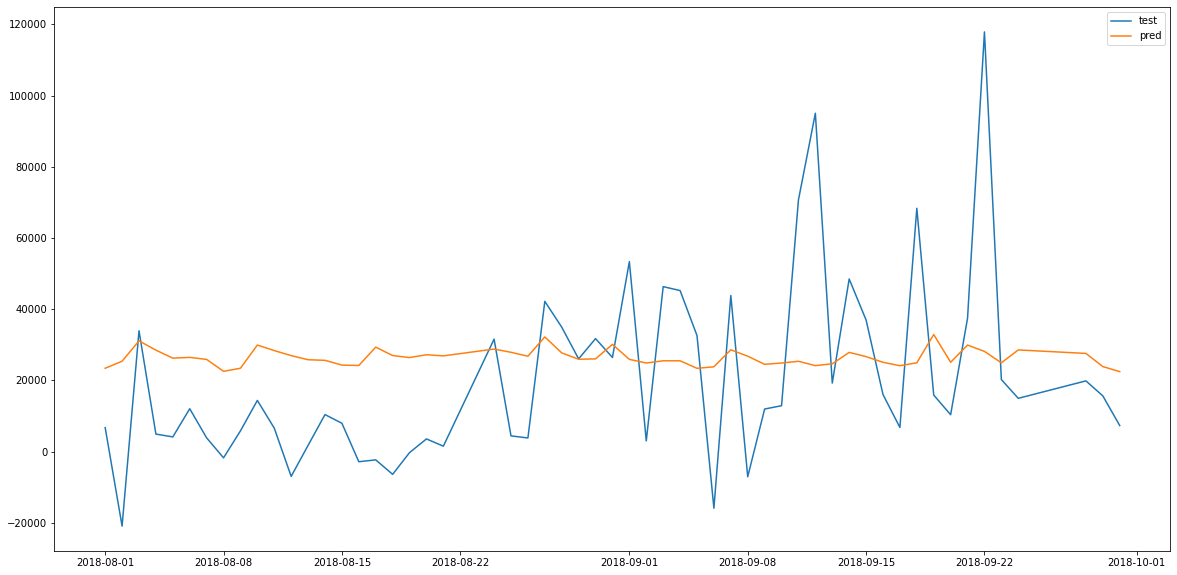

In [53]:
atm_id = 87
print(score_by_atm[atm_id])
plt.figure(figsize=(20, 10))
plt.plot(date_by_atm[atm_id], target_by_atm[atm_id], label='test')
plt.plot(date_by_atm[atm_id], predict_by_atm[atm_id], label='pred')
plt.legend()

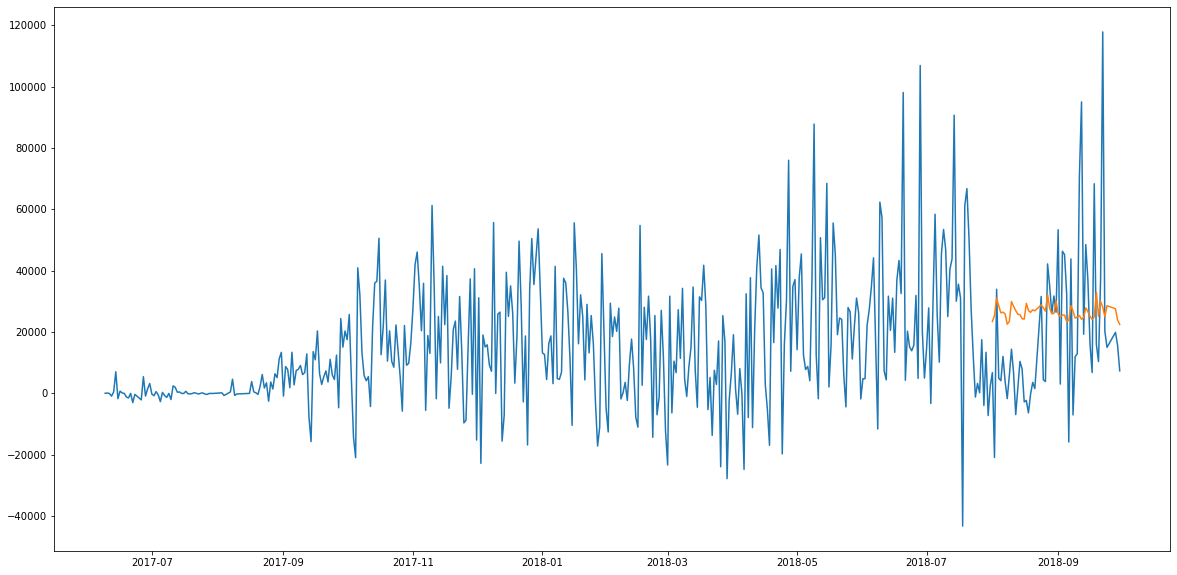

In [54]:
target_atm = 87

sorted_data = data_preprocessed.sort_values(by='datetime')
is_target = sorted_data.atm_id == target_atm 
date = sorted_data[is_target].datetime
target = sorted_data[is_target].target
plt.figure(figsize=(20, 10))
plt.plot(date, target);
plt.plot(date_by_atm[atm_id], predict_by_atm[atm_id]);

### ランダムフォレスト

In [55]:
# ランダムフォレスト

from sklearn.ensemble import RandomForestRegressor

score_by_atm = {}
predict_by_atm = {}
target_by_atm = {}
date_by_atm = {}
models = {}


for atm_id in dataset_by_atm.keys():
    
    target_data = dataset_by_atm[atm_id]
    is_test = target_data.datetime >= ratio_date
    test = target_data[is_test].sort_values(by='datetime')
    is_train_start = target_data.datetime >= train_start_date
    train = target_data[(~is_test) & (is_train_start)]
    
    if len(test) == 0:
        print(atm_id)
        break

    test_X = test[feature_cols]
    train_X = train[feature_cols]

    test_y = test[target_col]
    train_y = train[target_col]

    rf = RandomForestRegressor(random_state=1234)
    rf.fit(train_X, train_y)
    pred = rf.predict(test_X)
    mse = mean_squared_error(test_y, pred)
    rmse = np.sqrt(mse)

    models[atm_id] = *ridge.coef_, ridge.intercept_
    score_by_atm[atm_id] = rmse
    predict_by_atm[atm_id] = pred
    target_by_atm[atm_id] = test_y
    date_by_atm[atm_id] = test.datetime

24137.086445244964

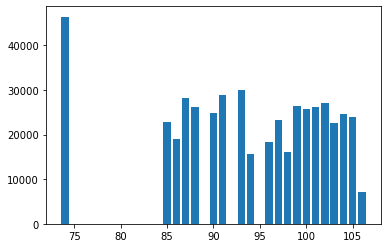

In [56]:
#　ランダムフォレスト

plt.bar(score_by_atm.keys(), list(score_by_atm.values()));
np.mean(list(score_by_atm.values()))

In [57]:
score_by_atm.values()

dict_values([28272.289219383834, 28855.151813929555, 24883.813966244154, 18334.134367761126, 23928.886691923213, 18893.06405605573, 26954.735399798337, 22768.86209003777, 24500.656629504374, 22583.658444742883, 7068.409015503119, 15559.920766696403, 25711.194182189414, 26114.748110741883, 29990.745058680608, 26179.053691069257, 46384.33316119835, 23271.466314733716, 26491.741953502005, 15994.863971203535])

In [58]:
score_by_atm.keys()

dict_keys([87, 91, 90, 96, 105, 86, 102, 85, 104, 103, 106, 94, 100, 101, 93, 88, 74, 97, 99, 98])

46384.33316119835


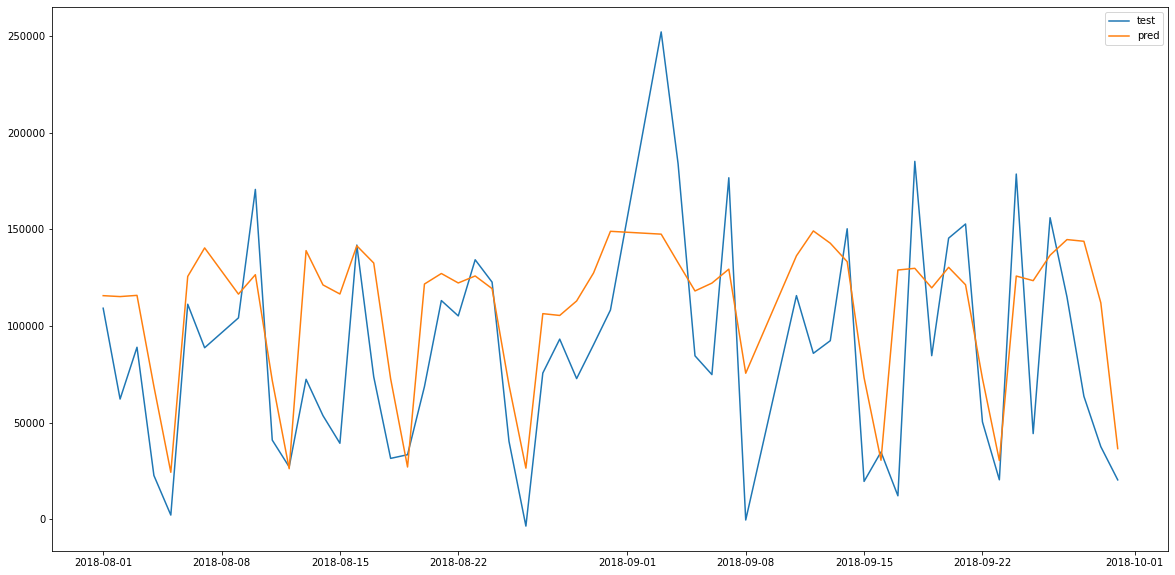

In [59]:
#　ランダムフォレスト
atm_id = 74
print(score_by_atm[atm_id])
plt.figure(figsize=(20, 10))
plt.plot(date_by_atm[atm_id], target_by_atm[atm_id], label='test')
plt.plot(date_by_atm[atm_id], predict_by_atm[atm_id], label='pred')
plt.legend();

28272.289219383834


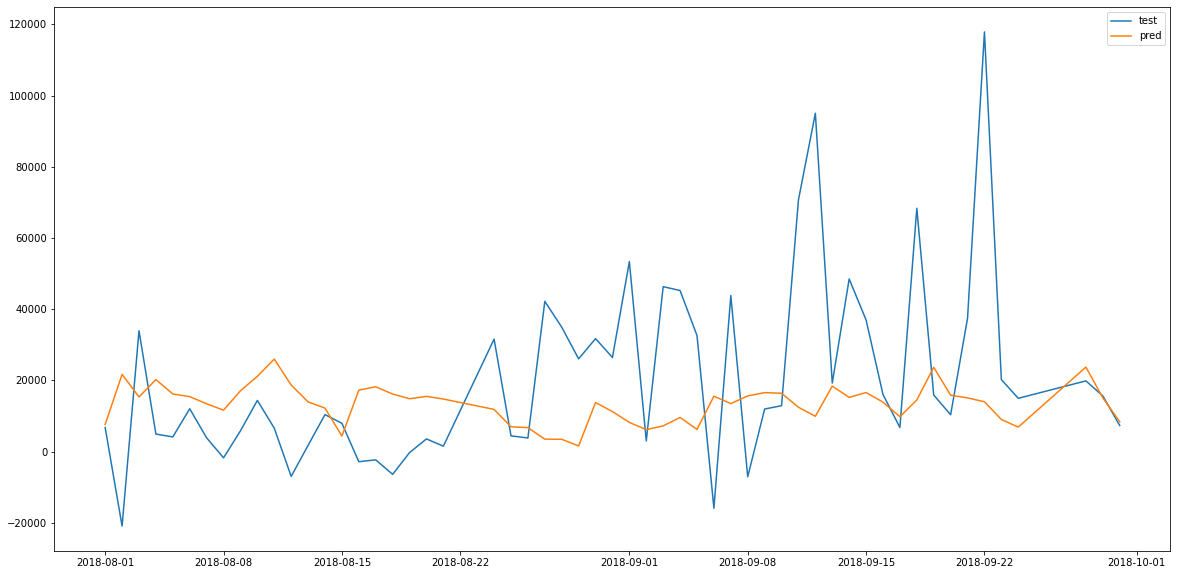

In [61]:
#　ランダムフォレスト
atm_id = 87
print(score_by_atm[atm_id])
plt.figure(figsize=(20, 10))
plt.plot(date_by_atm[atm_id], target_by_atm[atm_id], label='test')
plt.plot(date_by_atm[atm_id], predict_by_atm[atm_id], label='pred')
plt.legend();

### prophet

In [76]:
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [79]:
data_preprocessed2 = data_preprocessed
data_preprocessed2 = data_preprocessed2[['datetime' ,'target','atm_id']]
data_preprocessed2 = data_preprocessed2.rename(columns={'datetime':'ds', 'target':'y'})
data_preprocessed2

,ds,y,atm_id
0,2017-06-09,41,87
1,2017-06-10,99,87
2,2017-06-11,-15,87
3,2017-06-12,-901,87
4,2017-06-13,492,87
...,...,...,...
8387,2018-09-30,15721,102
8388,2018-09-30,48731,103
8389,2018-09-30,23458,104
8390,2018-09-30,-14177,105


In [80]:
target_col_p = ['y']
feature_cols_p = ['ds','y']
feature_cols_p

['ds', 'y']

In [81]:
dataset_by_atm = {}
for atm_id in data_preprocessed2.atm_id.unique():
    is_target = atm_id == data_preprocessed2.atm_id 
    data_by_atm = data_preprocessed2[is_target].reset_index(drop=True)
    dataset_by_atm[atm_id] = data_by_atm

In [82]:
score_by_atm = {}
predict_by_atm = {}
target_by_atm = {}
date_by_atm = {}
models = {}


for atm_id in dataset_by_atm.keys():
    
    target_data = dataset_by_atm[atm_id]
    is_test = target_data.ds >= ratio_date
    test = target_data[is_test].sort_values(by='ds')
    is_train_start = target_data.ds >= train_start_date
    train = target_data[(~is_test) & (is_train_start)]
    
    if len(test) == 0:
        print(atm_id)
        break

    test_X = test[feature_cols_p]
    train_X = train[feature_cols_p]

    test_y = test[target_col_p]
    train_y = train[target_col_p]


    m = Prophet()
    m.fit(train_X)
    
    pred = m.predict(test_X)
    pred = pred['yhat']
    
    mse = mean_squared_error(pred, test_y)
    rmse = np.sqrt(mse)

    score_by_atm[atm_id] = rmse
    predict_by_atm[atm_id] = pred
    target_by_atm[atm_id] = test_y
    date_by_atm[atm_id] = test.ds

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [90]:
plt.bar(score_by_atm.keys(), list(score_by_atm.values()));
np.mean(list(score_by_atm.values()))

23219.85686562198

In [84]:
score_by_atm.values()

dict_values([26463.08865526244, 26168.28173448843, 22932.147534940046, 18189.509336697196, 22726.471806416575, 17438.69671935754, 29616.857274946546, 23147.29576744502, 24154.392532214853, 20052.493602614366, 7108.238775362642, 14920.317665314496, 26992.40810530522, 26475.844552845945, 28692.06044898238, 24175.363917314407, 43774.80711240594, 20076.27628631495, 25619.26531992654, 15673.320164284034])

In [85]:
score_by_atm.keys()

dict_keys([87, 91, 90, 96, 105, 86, 102, 85, 104, 103, 106, 94, 100, 101, 93, 88, 74, 97, 99, 98])

43774.80711240594


<IPython.core.display.Javascript object>


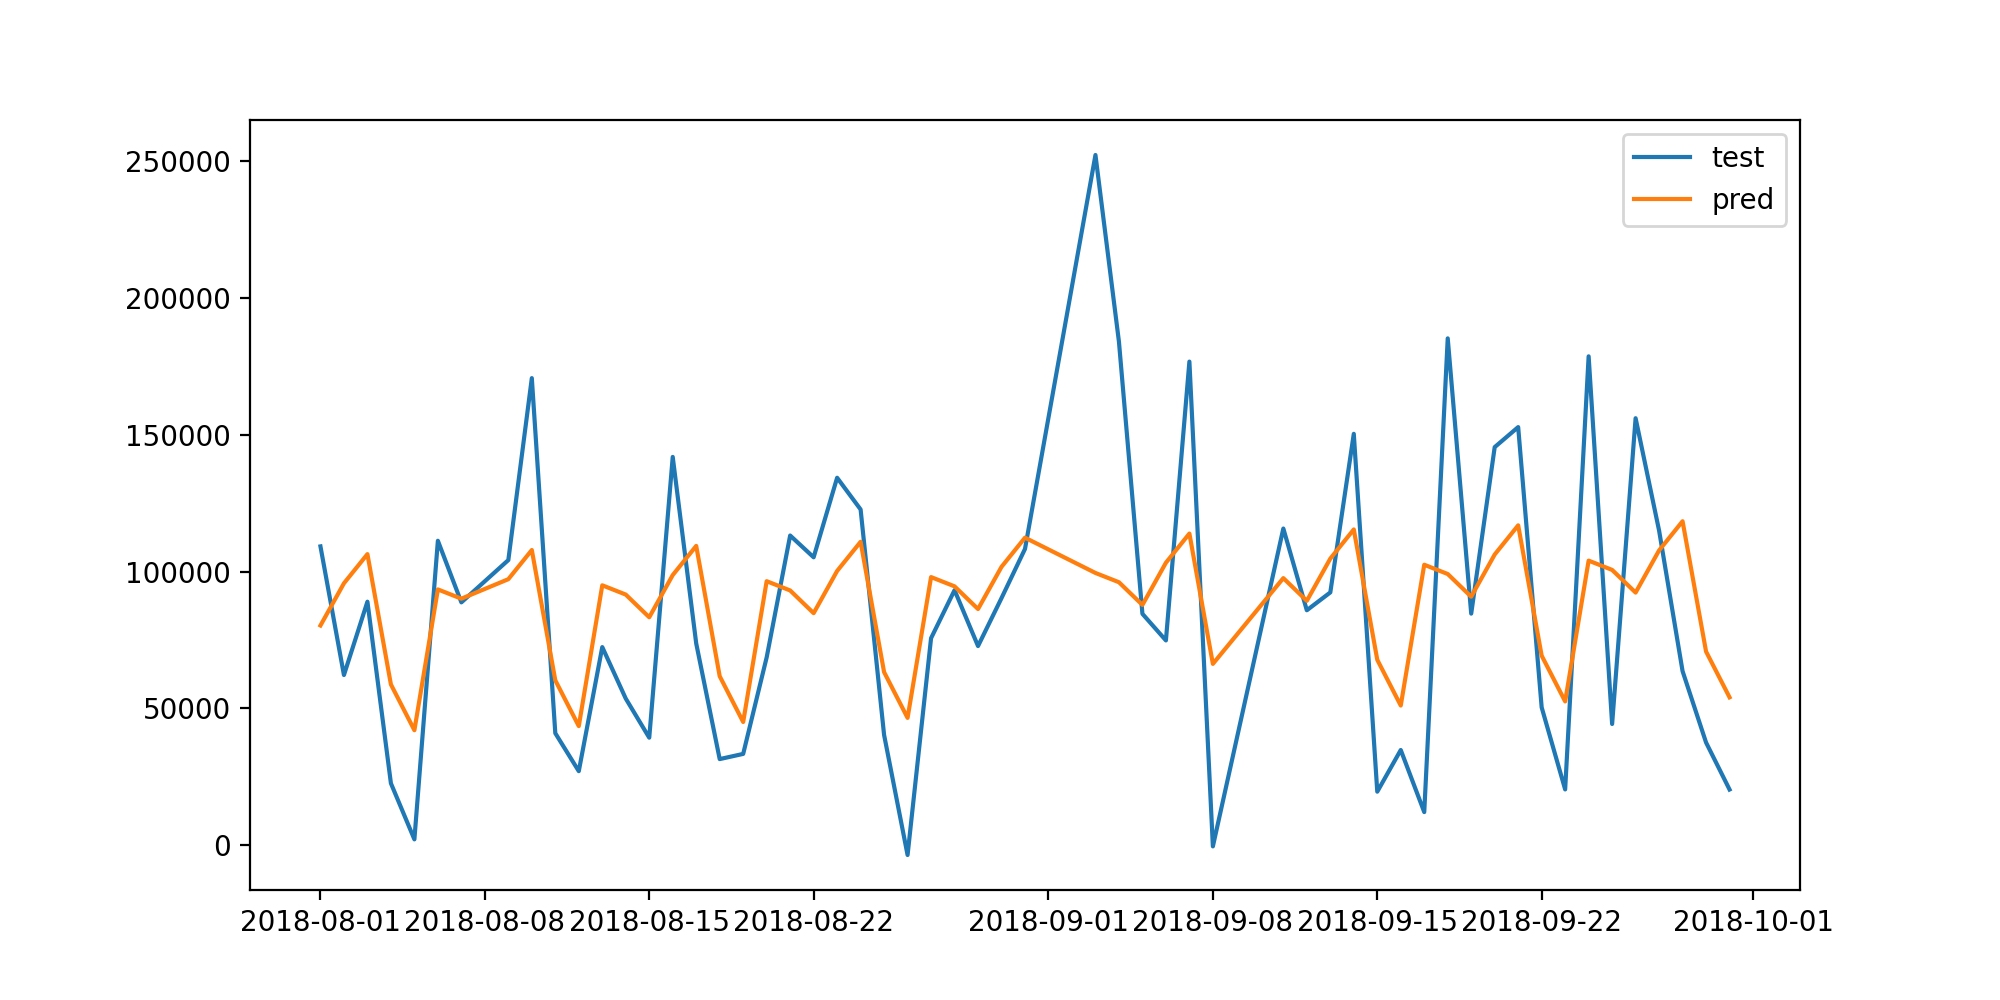

In [86]:
atm_id = 74
print(score_by_atm[atm_id])
plt.figure(figsize=(10, 5))
plt.plot(date_by_atm[atm_id], target_by_atm[atm_id], label='test')
plt.plot(date_by_atm[atm_id], predict_by_atm[atm_id], label='pred')
plt.legend();

26463.08865526244


<IPython.core.display.Javascript object>


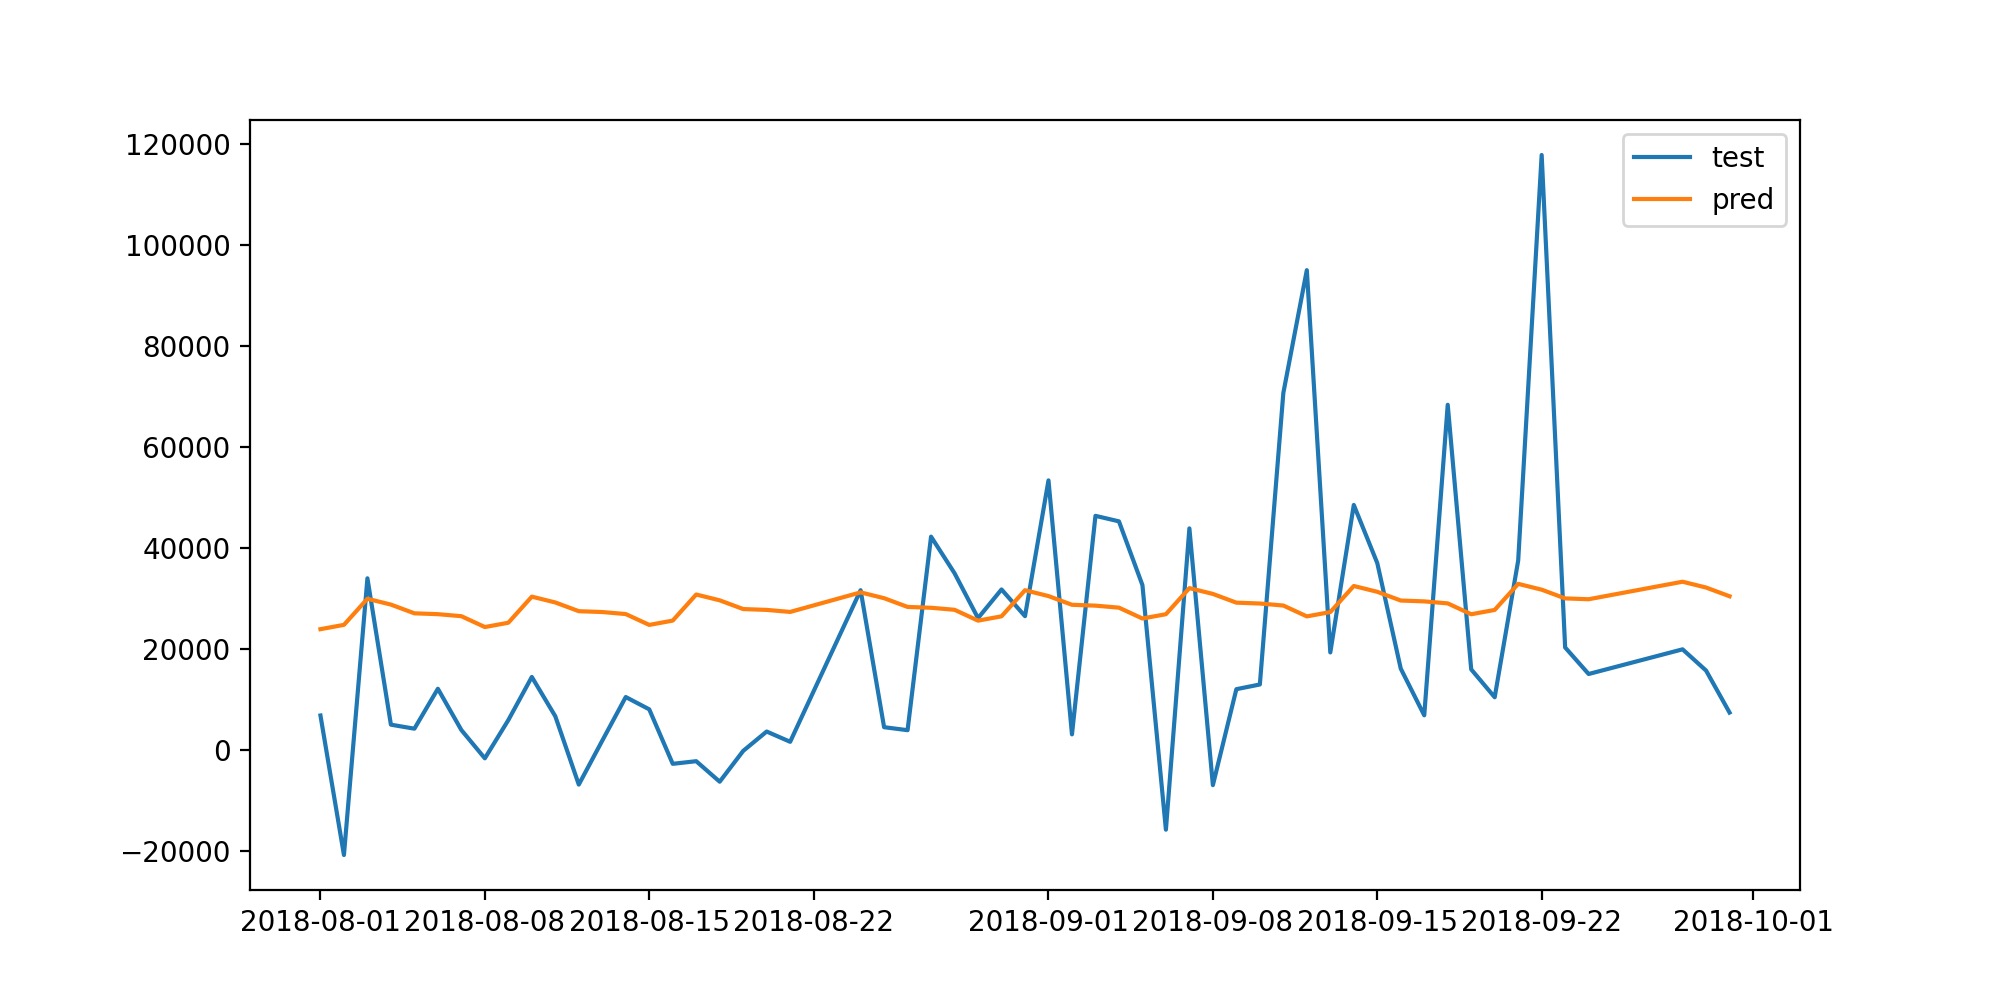

In [87]:
atm_id = 87
print(score_by_atm[atm_id])
plt.figure(figsize=(10, 5))
plt.plot(date_by_atm[atm_id], target_by_atm[atm_id], label='test')
plt.plot(date_by_atm[atm_id], predict_by_atm[atm_id], label='pred')
plt.legend();

### ATMグルーピング

In [53]:
columns = *feature_cols, 'intercept'
coef_matrix = pd.DataFrame(models, index=columns).T
coef_matrix

,month,week,day,month*2,month*3,month*4,week*2,week*3,week*4,dayofweek_1,...,dayofweek_4,dayofweek_5,dayofweek_6,salary10th,salary25th,日平均気温(℃),日最高気温(℃),日最低気温(℃),日降水量(mm),intercept
87,309.123369,549.087533,-232.908808,380.270508,-2450.899169,-4720.585614,1887.007827,2092.853586,4013.210647,51.842956,...,1388.867730,647.033173,162.877985,1722.641722,894.102133,5141.654143,-1063.785999,536.062007,522.542679,21593.092762
91,232.363401,134.142161,463.593967,-414.195737,1820.154579,4694.992154,-4262.151870,-3829.275312,-1748.046853,-1514.812745,...,-3494.470903,1164.341582,459.294348,3219.472834,1660.206294,6863.652120,-1306.246394,-3963.690455,-2384.305018,12881.380721
90,2292.721953,2585.043764,-1327.205577,-281.398274,-3934.872923,-7356.628111,3600.167127,2466.546338,1241.755476,-1856.221082,...,276.813967,-732.599096,-2772.069703,819.776338,837.849862,4462.781421,-5931.441809,-508.283676,-395.477994,16768.377022
96,1736.635579,1621.369714,-289.193077,103.563957,-1574.740547,-3118.447678,781.762626,123.602112,71.745301,-311.955285,...,408.016499,-696.563674,-2303.119293,160.813472,-210.661223,2296.713562,-886.570993,-1869.098612,-874.549752,12442.993119
105,4276.570325,4643.207904,97.739456,-502.024196,-3306.490119,-5477.814385,525.667918,678.438865,1861.326898,1219.201216,...,2140.368415,-4227.065783,-3035.357932,3221.941479,-66.119871,2239.111951,-1127.540233,-988.504136,-790.089965,19583.550014
86,2036.326044,1474.029653,-463.375780,-1456.961385,-2488.862102,-2909.849048,333.434222,1342.283702,2681.450828,-1394.235618,...,-181.105968,-3048.875787,-2972.720279,119.372774,1665.776953,1066.558429,-749.313502,-1072.649813,-682.712868,10924.855213
102,6696.235469,6047.456480,-1659.314507,-1362.532764,-2903.592388,-2422.579668,-2786.902766,-2718.323001,-405.576236,296.710844,...,-916.885187,2678.811533,-175.555367,37.062314,2671.172348,-1203.231865,-1141.524118,1365.452121,-700.648756,19161.067465
85,8325.197559,9033.654972,-373.051245,-938.373223,-8511.337644,-14060.955334,5269.503883,3042.889425,2595.152796,-374.919153,...,1908.295696,-7065.437631,-7892.001018,-1205.425309,1679.152903,254.916342,-1462.631320,-346.183583,895.331591,30365.714400
104,3240.326626,3563.747967,709.741971,1489.538595,-1437.643082,-3683.448907,3234.812405,-932.387050,-4305.841375,-233.826471,...,1385.729996,297.404831,-1824.173193,1620.824579,-172.315795,4985.241766,-1859.148125,-1500.313026,-1313.040154,18954.570409
103,3026.724402,3208.091073,-511.021349,1833.859766,-3467.137721,-8610.003371,4226.803417,1710.050050,-507.088824,-1262.847921,...,714.215866,1877.013043,-2890.581535,-677.670218,-461.746084,-2588.889663,-1392.315142,5531.615311,-18.436679,20511.615866


In [54]:
from sklearn.preprocessing import StandardScaler

# 標準化を行う
scaler = StandardScaler()
scaler.fit(coef_matrix)
coef_matrix2 = scaler.transform(coef_matrix)
coef_matrix2

array([[-8.44878587e-01, -7.69644383e-01,  5.85081681e-03,
         3.07744134e-01,  3.23026935e-01,  2.76611209e-01,
        -3.74258971e-02,  6.86436947e-01,  1.54028555e+00,
         2.25370165e-01,  1.71800951e-02, -3.96256086e-01,
         3.88289790e-01,  2.86275482e-01,  5.32112637e-01,
         9.44442945e-01,  5.33284920e-01,  1.51060221e+00,
         3.71941050e-01,  1.15142393e-01,  1.48352201e+00,
         2.64931757e-01],
       [-8.65779118e-01, -8.77925007e-01,  6.19359795e-01,
        -3.98732240e-01,  1.85842433e+00,  2.24073286e+00,
        -2.53926226e+00, -2.43527076e+00, -9.68107646e-01,
        -1.14845701e+00, -3.87719731e-01, -1.15944038e+00,
        -2.60788277e+00,  4.19729328e-01,  6.01394047e-01,
         1.96146836e+00,  1.28981862e+00,  2.21896445e+00,
         2.68352751e-01, -1.87846958e+00, -2.57983054e+00,
        -5.06237463e-01],
       [-3.04775925e-01, -2.38358515e-01, -9.58051865e-01,
        -2.80642552e-01, -2.10445497e-01, -2.73276251e-01,
    

In [55]:
coef_matrix2 = (coef_matrix - coef_matrix.mean()) / coef_matrix.std()
coef_matrix2

,month,week,day,month*2,month*3,month*4,week*2,week*3,week*4,dayofweek_1,...,dayofweek_4,dayofweek_5,dayofweek_6,salary10th,salary25th,日平均気温(℃),日最高気温(℃),日最低気温(℃),日降水量(mm),intercept
87,-0.823486,-0.750157,0.005703,0.299952,0.314848,0.269607,-0.036478,0.669056,1.501285,0.219664,...,0.378458,0.279027,0.518639,0.920529,0.519782,1.472353,0.362523,0.112227,1.445958,0.258224
91,-0.843857,-0.855695,0.603677,-0.388636,1.811368,2.183996,-2.474967,-2.373608,-0.943595,-1.119377,...,-2.541850,0.409102,0.586166,1.911803,1.257160,2.162779,0.261558,-1.830906,-2.514508,-0.493419
90,-0.297059,-0.232323,-0.933793,-0.273537,-0.205117,-0.266357,0.642886,0.861051,0.325175,-1.411184,...,-0.286566,-0.067875,-0.149977,0.322608,0.465639,1.200162,-1.664466,-0.338754,0.195191,-0.158051
96,-0.444639,-0.477428,-0.042620,0.060122,0.621842,0.595356,-0.474770,-0.342704,-0.171337,-0.091279,...,-0.208105,-0.058814,-0.043144,-0.113789,-0.543557,0.331689,0.436319,-0.926396,-0.457525,-0.531243
105,0.229434,0.291159,0.289577,-0.464760,0.015060,0.115646,-0.576326,-0.057640,0.588099,1.217420,...,0.827866,-0.946542,-0.209957,1.913438,-0.404435,0.308594,0.335975,-0.546128,-0.342452,0.084841
86,-0.365104,-0.514903,-0.192162,-1.292433,0.301546,0.637769,-0.652558,0.283429,0.936132,-1.016319,...,-0.560409,-0.650292,-0.195687,-0.141233,1.262521,-0.161535,0.493476,-0.582465,-0.196155,-0.662227
102,0.871589,0.648321,-1.218922,-1.210589,0.156230,0.736841,-1.889947,-1.802825,-0.373896,0.428955,...,-1.000416,0.789908,0.441540,-0.195743,2.230218,-1.071596,0.330152,0.470383,-0.220592,0.048389
85,1.303899,1.407843,-0.114615,-0.842957,-1.808649,-1.629490,1.304872,1.157164,0.899510,-0.145095,...,0.689084,-1.660237,-1.316358,-1.018578,1.275396,-0.486959,0.196436,-0.268754,1.953869,1.015122
104,-0.045574,0.016604,0.815005,1.261388,0.669879,0.480479,0.498002,-0.885249,-2.029035,-0.024502,...,0.376582,0.191114,0.065965,0.853101,-0.506649,1.409640,0.031319,-0.767143,-1.054951,0.030573
103,-0.102262,-0.073855,-0.233068,1.559822,-0.041229,-0.521195,0.891383,0.472380,-0.416975,-0.904020,...,-0.024994,0.588299,-0.176975,-0.669073,-0.785227,-1.627168,0.225717,2.269462,0.708895,0.164914


In [56]:
# データフレームの各列を正規化
coef_matrix3 = coef_matrix.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
coef_matrix3

,month,week,day,month*2,month*3,month*4,week*2,week*3,week*4,dayofweek_1,...,dayofweek_4,dayofweek_5,dayofweek_6,salary10th,salary25th,日平均気温(℃),日最高気温(℃),日最低気温(℃),日降水量(mm),intercept
87,-0.187336,-0.170328,0.001156,0.093854,0.070490,0.058836,-0.008511,0.189493,0.425255,0.070746,...,0.077020,0.064662,0.109317,0.203865,0.129437,0.388489,0.079871,0.027370,0.323598,0.054050
91,-0.191970,-0.194292,0.122405,-0.121603,0.405542,0.476607,-0.577484,-0.672263,-0.267283,-0.360513,...,-0.517294,0.094805,0.123550,0.423397,0.313060,0.570662,0.057626,-0.446522,-0.562734,-0.103281
90,-0.067578,-0.052751,-0.189341,-0.085589,-0.045923,-0.058126,0.150005,0.243871,0.092109,-0.454494,...,-0.058319,-0.015729,-0.031612,0.071446,0.115954,0.316670,-0.366713,-0.082616,0.043683,-0.033083
96,-0.101151,-0.108403,-0.008642,0.018812,0.139222,0.129923,-0.110778,-0.097062,-0.048533,-0.029398,...,-0.042352,-0.013630,-0.009094,-0.025200,-0.135357,0.087518,0.096129,-0.225930,-0.102392,-0.111198
105,0.052194,0.066110,0.058716,-0.145422,0.003372,0.025237,-0.134474,-0.016325,0.166585,0.392089,...,0.168480,-0.219352,-0.044254,0.423759,-0.100713,0.081424,0.074021,-0.133190,-0.076639,0.017759
86,-0.083058,-0.116912,-0.038964,-0.404399,0.067512,0.139178,-0.152261,0.080274,0.265169,-0.327321,...,-0.114049,-0.150699,-0.041246,-0.031278,0.314395,-0.042622,0.108722,-0.142052,-0.043899,-0.138615
102,0.198279,0.147206,-0.247156,-0.378790,0.034978,0.160799,-0.440982,-0.510603,-0.105910,0.138152,...,-0.203595,0.183054,0.093066,-0.043350,0.555373,-0.282747,0.072738,0.114717,-0.049367,0.010129
85,0.296626,0.319660,-0.023240,-0.263759,-0.404933,-0.355599,0.304466,0.327737,0.254796,-0.046730,...,0.140236,-0.384744,-0.277458,-0.225579,0.317601,-0.128487,0.043278,-0.065544,0.437266,0.212481
104,-0.010368,0.003770,0.165255,0.394685,0.149977,0.104854,0.116199,-0.250724,-0.574745,-0.007891,...,0.076638,0.044289,0.013904,0.188932,-0.126167,0.371942,0.006900,-0.187091,-0.236093,0.006399
103,-0.023264,-0.016769,-0.047258,0.488064,-0.009231,-0.113739,0.207986,0.133789,-0.118112,-0.291154,...,-0.005086,0.136333,-0.037302,-0.148176,-0.195539,-0.429338,0.049730,0.553478,0.158647,0.034519


In [57]:
# KMeansで似た傾向のatm_idを可視化
%matplotlib notebook
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

In [58]:
data = coef_matrix2

In [59]:
# モデルを初期化
km =KMeans(n_clusters=3, random_state=1234)

km.fit(data)

cluster_label = km.predict(data)

In [60]:
import copy

data_with_cluster_label = copy.copy(data)
data_with_cluster_label['cluster_label'] = cluster_label

<IPython.core.display.Javascript object>


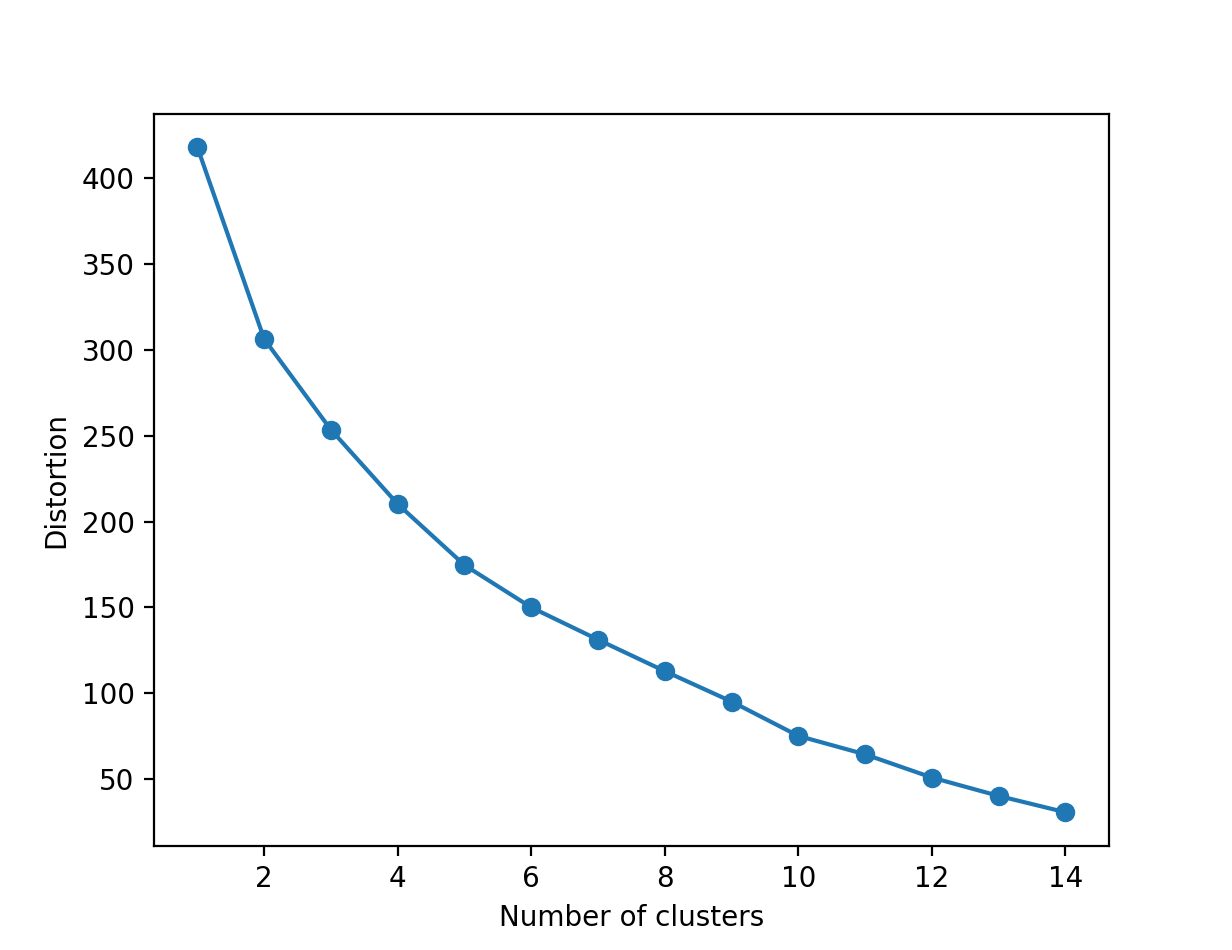

In [61]:
distortions = []

for i  in range(1,15):                # 1~14クラスタまで計算 
    km = KMeans(n_clusters=i, random_state=1234)
    km.fit(data)                       # クラスタリングの計算を実行
    distortions.append(km.inertia_)   

plt.plot(range(1,15),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [62]:
#1回目グルーピング
coef_matrix_cluster1 = coef_matrix2[['week' ,'day']]
coef_matrix_cluster1

,week,day
87,-0.750157,0.005703
91,-0.855695,0.603677
90,-0.232323,-0.933793
96,-0.477428,-0.042620
105,0.291159,0.289577
86,-0.514903,-0.192162
102,0.648321,-1.218922
85,1.407843,-0.114615
104,0.016604,0.815005
103,-0.073855,-0.233068


In [63]:
c_array= np.array([
    coef_matrix_cluster1['week'].tolist(),
    coef_matrix_cluster1['day'].tolist()
    ], np.float)
c_array

array([[-0.75015655, -0.85569545, -0.23232314, -0.47742793,  0.29115872,
        -0.514903  ,  0.64832103,  1.40784293,  0.01660448, -0.07385475,
        -0.62640785, -0.2622843 , -0.59540285, -0.65556073,  0.89892444,
        -0.20159068,  3.37106856, -1.03311344,  0.01798941, -0.37318888],
       [ 0.00570267,  0.60367725, -0.93379345, -0.04261955,  0.289577  ,
        -0.19216214, -1.21892182, -0.11461503,  0.81500484, -0.23306771,
         0.2111533 ,  0.53589478, -0.2936416 ,  0.5207199 , -2.70526928,
        -0.13444244,  2.2265265 ,  0.54755211, -0.97664926,  1.08937391]])

In [64]:
c_array = c_array.T
print(c_array)

[[-0.75015655  0.00570267]
 [-0.85569545  0.60367725]
 [-0.23232314 -0.93379345]
 [-0.47742793 -0.04261955]
 [ 0.29115872  0.289577  ]
 [-0.514903   -0.19216214]
 [ 0.64832103 -1.21892182]
 [ 1.40784293 -0.11461503]
 [ 0.01660448  0.81500484]
 [-0.07385475 -0.23306771]
 [-0.62640785  0.2111533 ]
 [-0.2622843   0.53589478]
 [-0.59540285 -0.2936416 ]
 [-0.65556073  0.5207199 ]
 [ 0.89892444 -2.70526928]
 [-0.20159068 -0.13444244]
 [ 3.37106856  2.2265265 ]
 [-1.03311344  0.54755211]
 [ 0.01798941 -0.97664926]
 [-0.37318888  1.08937391]]


In [65]:
num_clusters = 3
clf = KMeans(n_clusters = num_clusters ) 
clf.fit(c_array) 
pred = clf.predict(c_array) 
pred

array([0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0],
      dtype=int32)

In [66]:
coef_matrix_cluster1['atm_cluster_id'] = pred
coef_matrix_cluster1

<ipython-input-66-a13fb29f4173>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_matrix_cluster1['atm_cluster_id'] = pred


,week,day,atm_cluster_id
87,-0.750157,0.005703,0
91,-0.855695,0.603677,0
90,-0.232323,-0.933793,2
96,-0.477428,-0.042620,0
105,0.291159,0.289577,0
86,-0.514903,-0.192162,0
102,0.648321,-1.218922,2
85,1.407843,-0.114615,2
104,0.016604,0.815005,0
103,-0.073855,-0.233068,0


<IPython.core.display.Javascript object>


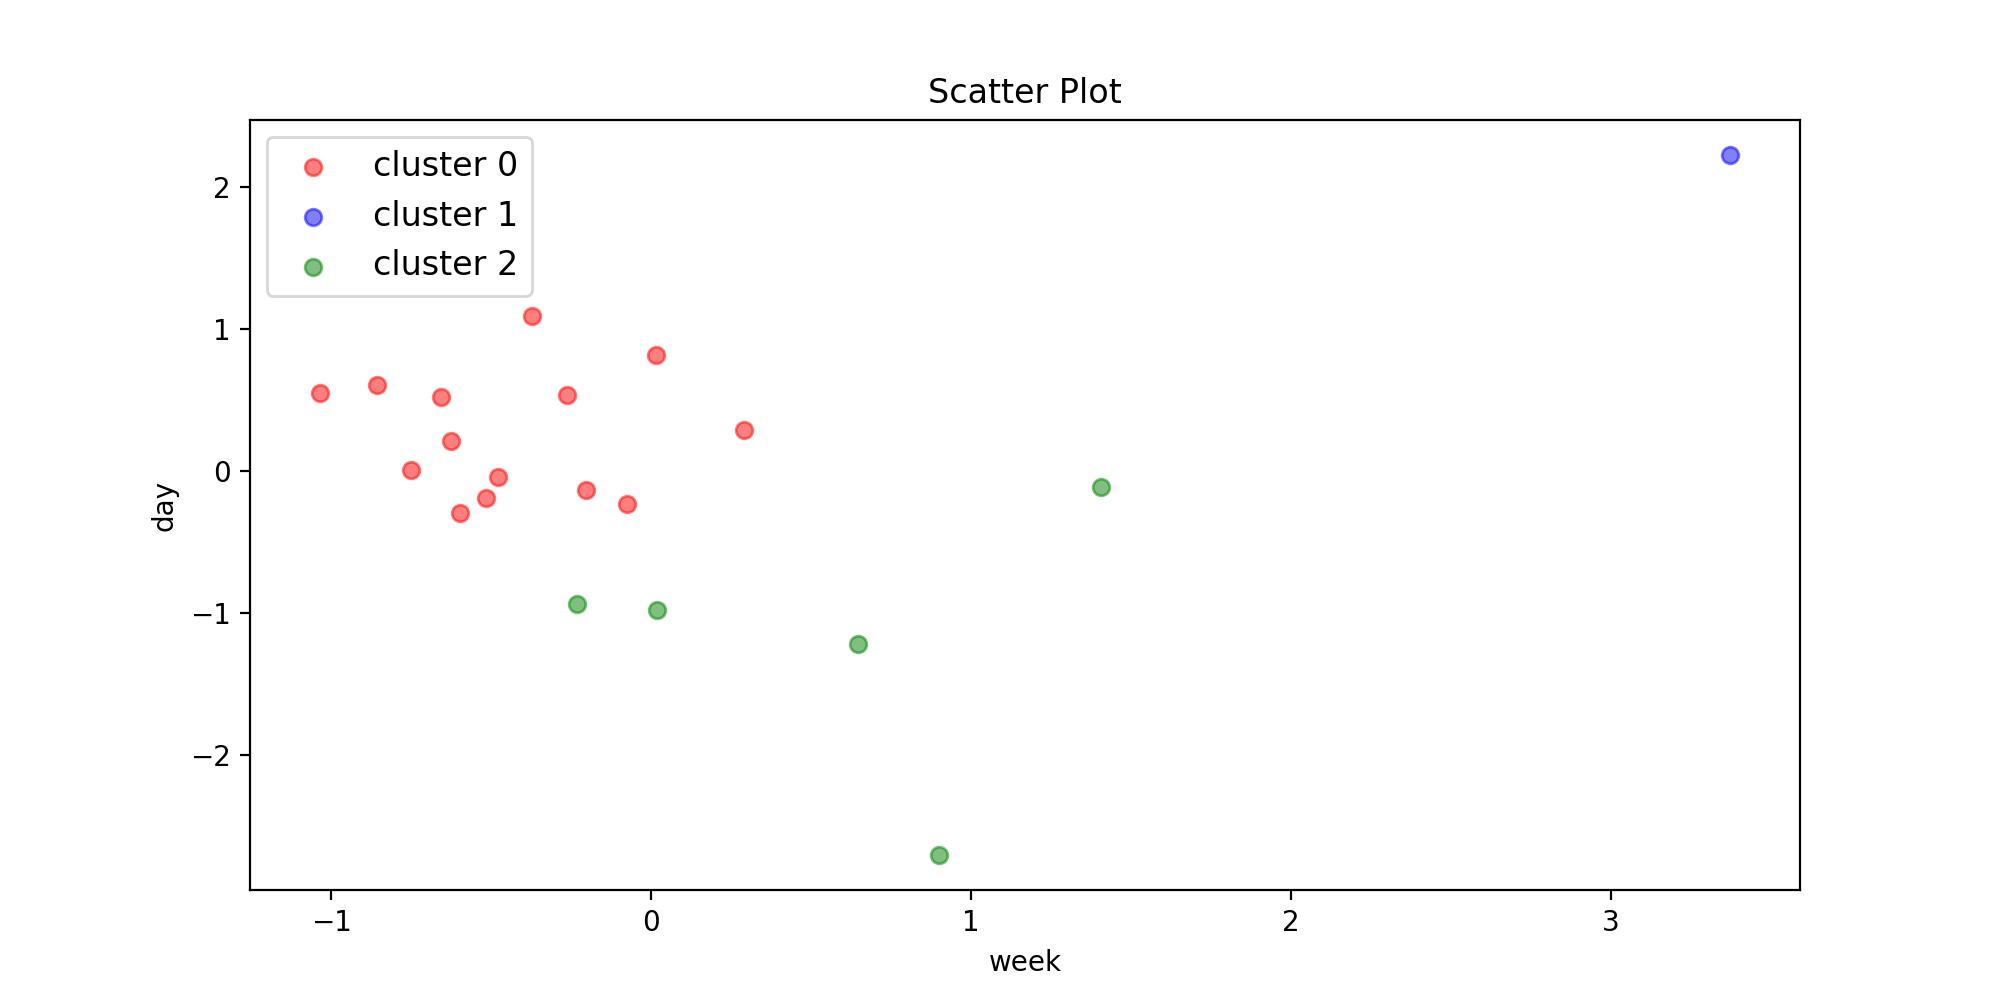

In [92]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
colors = ['Red', 'Blue', 'Green']
 
for t in range(num_clusters):
    x = coef_matrix_cluster1.loc[coef_matrix_cluster1['atm_cluster_id'] == t, 'week']
    y = coef_matrix_cluster1.loc[coef_matrix_cluster1['atm_cluster_id'] == t, 'day']
 
    ax.scatter(x, y, alpha=0.5, label='cluster ' + str(t), color=colors[t])
 
ax.set_title('Scatter Plot')
ax.set_xlabel('week')
ax.set_ylabel('day')
 
ax.legend(loc='upper left', fontsize=12)
 
plt.show()

In [100]:
#2回目グルーピング
coef_matrix_cluster2 = coef_matrix2[['intercept' ,'week']]
coef_matrix_cluster2

c_array= np.array([
    coef_matrix_cluster2['week'].tolist(),
    coef_matrix_cluster2['intercept'].tolist()
    ], np.float)

c_array = c_array.T

num_clusters = 3
clf = KMeans(n_clusters = num_clusters ) 
clf.fit(c_array) 
pred = clf.predict(c_array) 

coef_matrix_cluster2['atm_cluster_id'] = pred
coef_matrix_cluster2


,intercept,week,atm_cluster_id
87,0.258224,-0.750157,1
91,-0.493419,-0.855695,1
90,-0.158051,-0.232323,1
96,-0.531243,-0.477428,1
105,0.084841,0.291159,2
86,-0.662227,-0.514903,1
102,0.048389,0.648321,2
85,1.015122,1.407843,2
104,0.030573,0.016604,1
103,0.164914,-0.073855,1


<IPython.core.display.Javascript object>


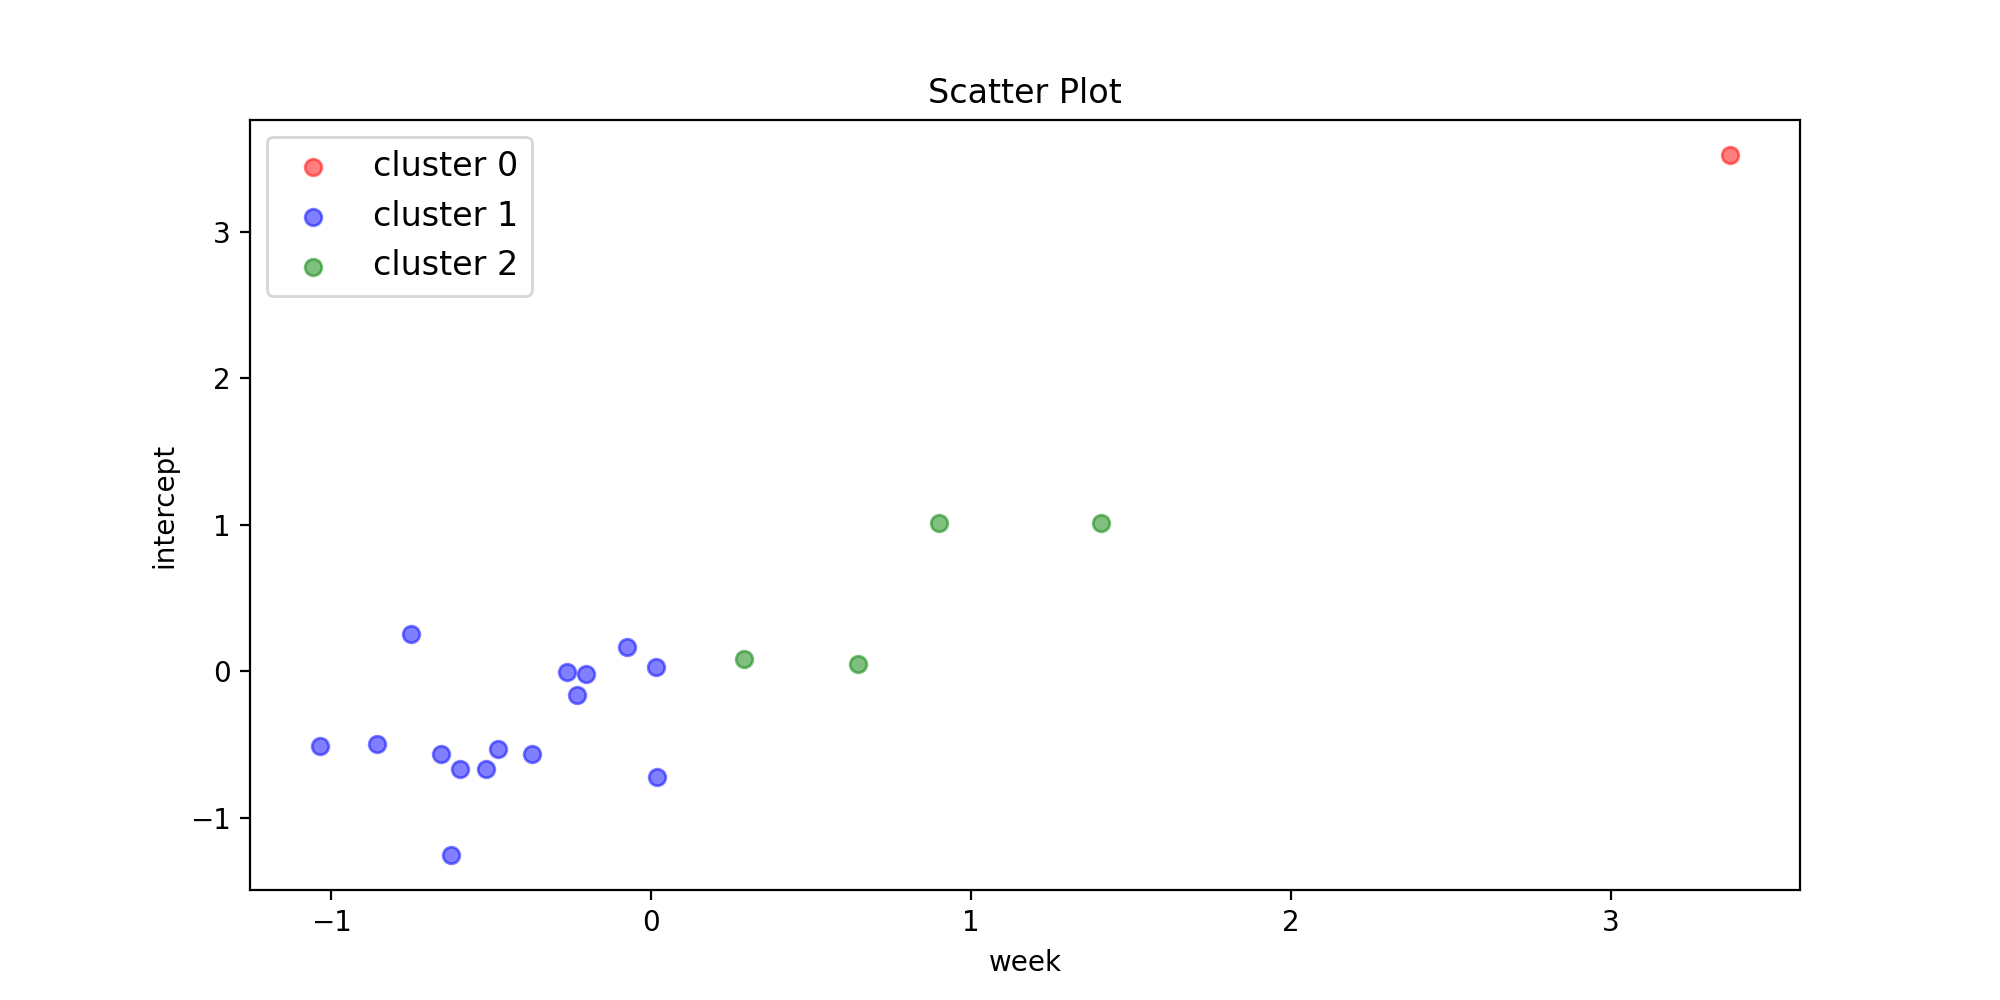

In [101]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, )
colors = ['Red', 'Blue', 'Green']
 
for t in range(num_clusters):
    x = coef_matrix_cluster2.loc[coef_matrix_cluster2['atm_cluster_id'] == t, 'week']
    y = coef_matrix_cluster2.loc[coef_matrix_cluster2['atm_cluster_id'] == t, 'intercept']
 
    ax.scatter(x, y, alpha=0.5, label='cluster ' + str(t), color=colors[t])
 
ax.set_title('Scatter Plot')
ax.set_xlabel('week')
ax.set_ylabel('intercept')
 
ax.legend(loc='upper left', fontsize=12)
 
plt.show()

In [102]:
#3回目グルーピング
coef_matrix_cluster3 = coef_matrix2[['intercept' ,'day']]
coef_matrix_cluster3

c_array= np.array([
    coef_matrix_cluster3['day'].tolist(),
    coef_matrix_cluster3['intercept'].tolist()
    ], np.float)

c_array = c_array.T

num_clusters = 3
clf = KMeans(n_clusters = num_clusters ) 
clf.fit(c_array) 
pred = clf.predict(c_array) 

coef_matrix_cluster3['atm_cluster_id'] = pred
coef_matrix_cluster3



,intercept,day,atm_cluster_id
87,0.258224,0.005703,0
91,-0.493419,0.603677,0
90,-0.158051,-0.933793,2
96,-0.531243,-0.042620,0
105,0.084841,0.289577,0
86,-0.662227,-0.192162,0
102,0.048389,-1.218922,2
85,1.015122,-0.114615,0
104,0.030573,0.815005,0
103,0.164914,-0.233068,0


<IPython.core.display.Javascript object>


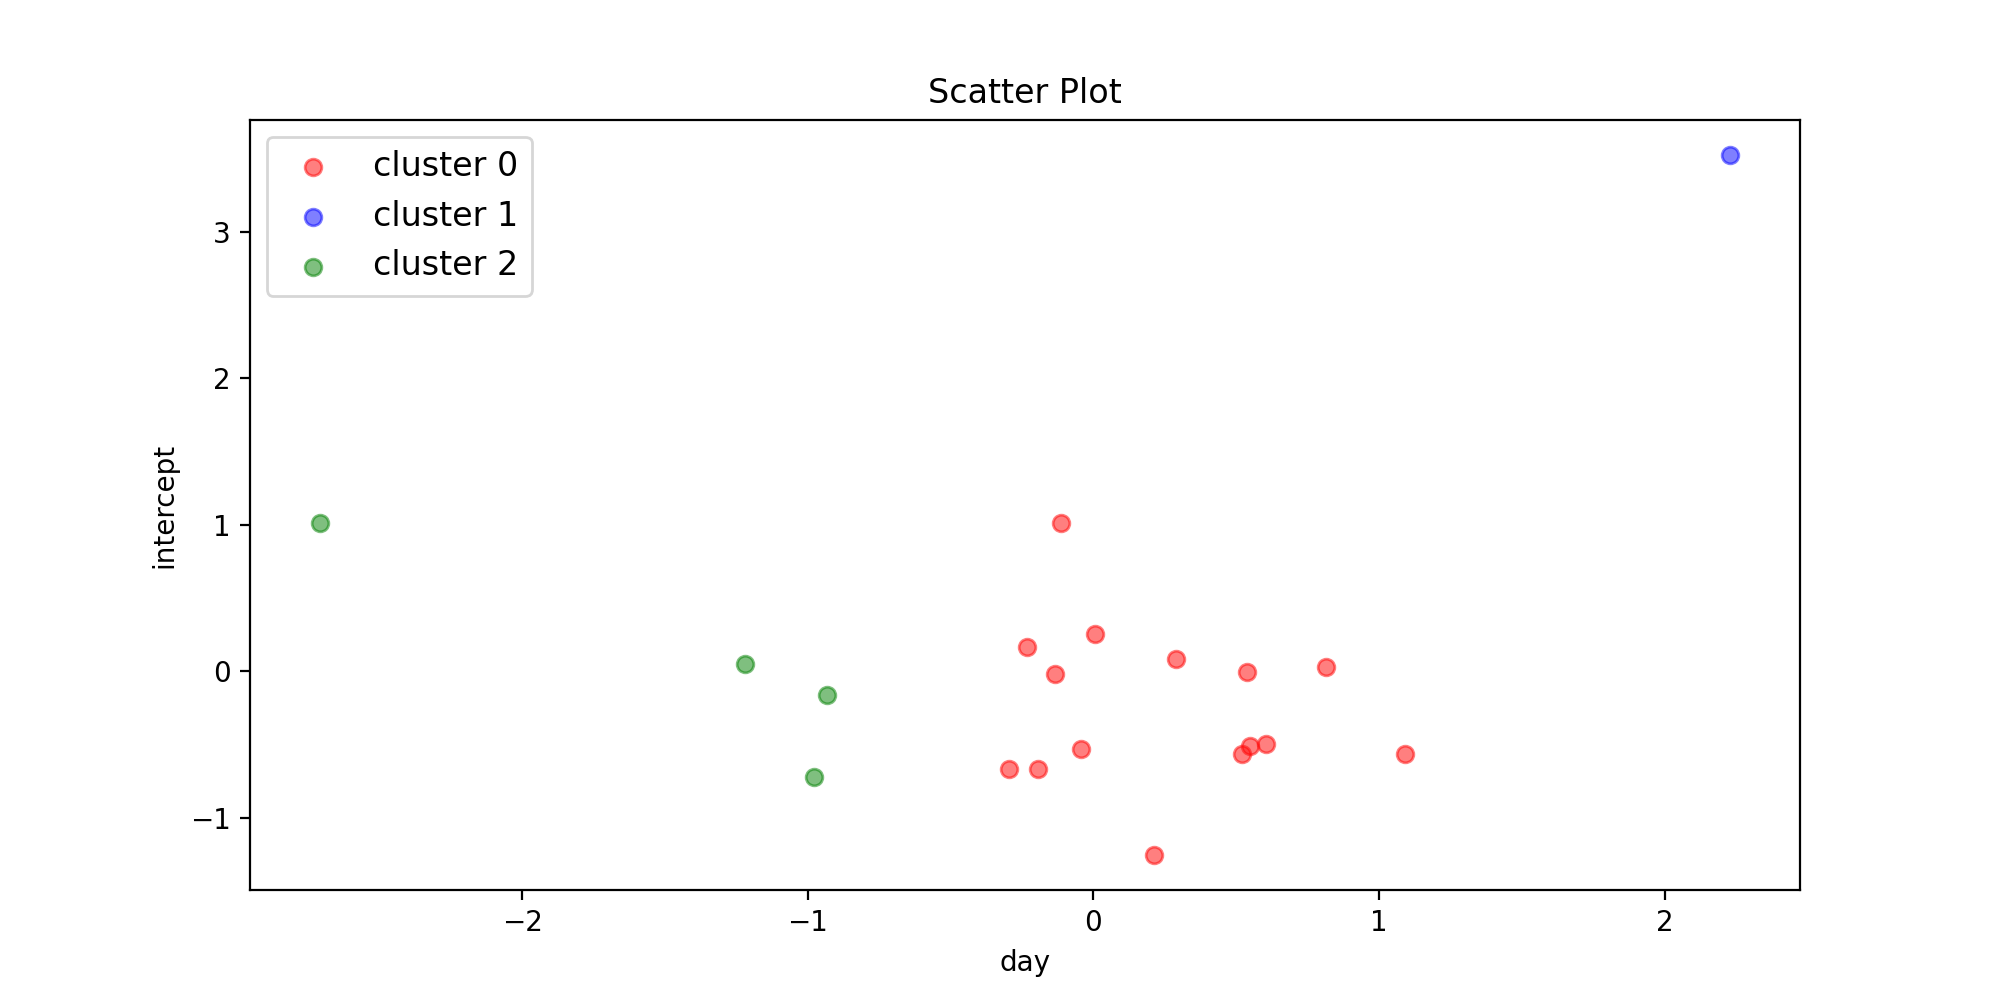

In [103]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, )
colors = ['Red', 'Blue', 'Green']
 
for t in range(num_clusters):
    x = coef_matrix_cluster3.loc[coef_matrix_cluster3['atm_cluster_id'] == t, 'day']
    y = coef_matrix_cluster3.loc[coef_matrix_cluster3['atm_cluster_id'] == t, 'intercept']
 
    ax.scatter(x, y, alpha=0.5, label='cluster ' + str(t), color=colors[t])
 
ax.set_title('Scatter Plot')
ax.set_xlabel('day')
ax.set_ylabel('intercept')
 
ax.legend(loc='upper left', fontsize=12)
 
plt.show()

In [106]:
#4回目グルーピング
coef_matrix_cluster4 = coef_matrix2[['intercept' ,'salary25th']]
coef_matrix_cluster4

c_array= np.array([
    coef_matrix_cluster4['intercept'].tolist(),
    coef_matrix_cluster4['salary25th'].tolist()
    ], np.float)

c_array = c_array.T

num_clusters = 3
clf = KMeans(n_clusters = num_clusters ) 
clf.fit(c_array) 
pred = clf.predict(c_array) 

coef_matrix_cluster4['atm_cluster_id'] = pred
coef_matrix_cluster4




,intercept,salary25th,atm_cluster_id
87,0.258224,0.519782,0
91,-0.493419,1.257160,0
90,-0.158051,0.465639,0
96,-0.531243,-0.543557,2
105,0.084841,-0.404435,2
86,-0.662227,1.262521,0
102,0.048389,2.230218,0
85,1.015122,1.275396,0
104,0.030573,-0.506649,2
103,0.164914,-0.785227,2


<IPython.core.display.Javascript object>


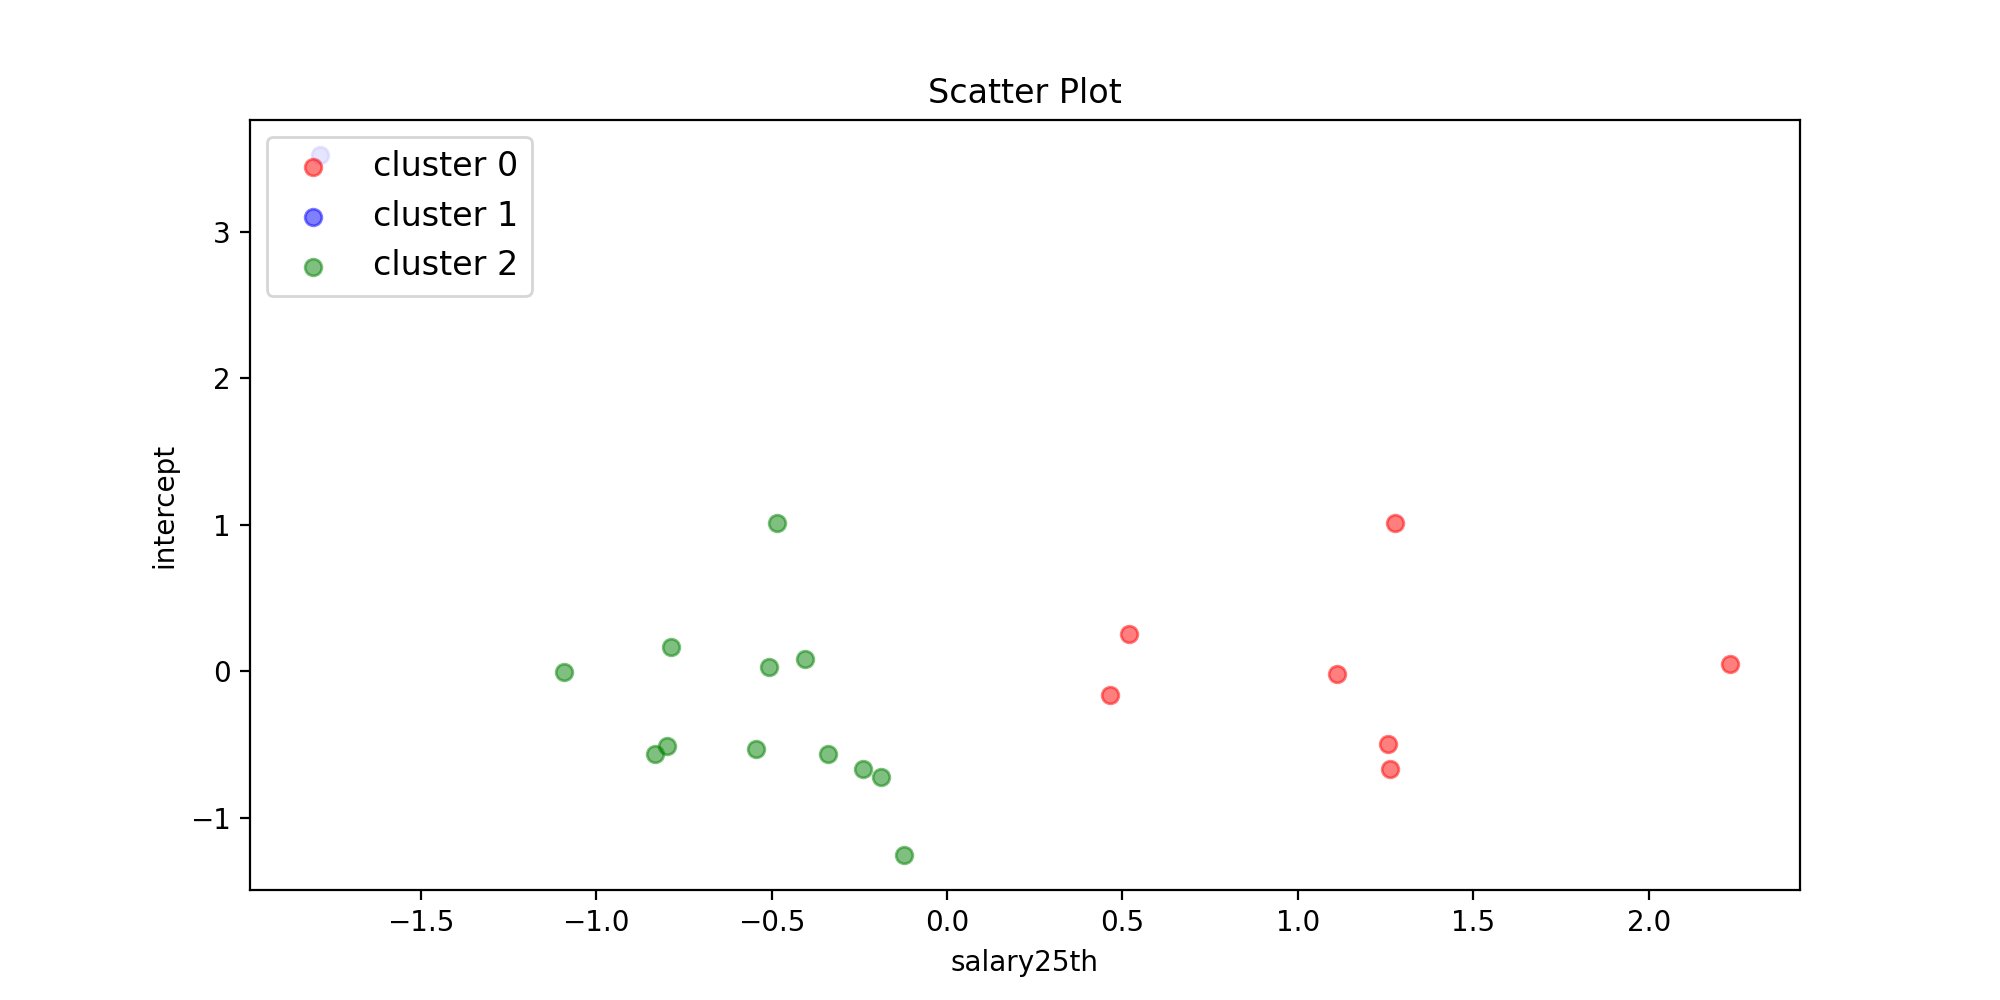

In [108]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, )
colors = ['Red', 'Blue', 'Green']
 
for t in range(num_clusters):
    x = coef_matrix_cluster4.loc[coef_matrix_cluster4['atm_cluster_id'] == t, 'salary25th']
    y = coef_matrix_cluster4.loc[coef_matrix_cluster4['atm_cluster_id'] == t, 'intercept']
 
    ax.scatter(x, y, alpha=0.5, label='cluster ' + str(t), color=colors[t])
 
ax.set_title('Scatter Plot')
ax.set_xlabel('salary25th')
ax.set_ylabel('intercept')
 
ax.legend(loc='upper left', fontsize=12)
 
plt.show()

In [72]:
#5回目グルーピング
coef_matrix_cluster5 = coef_matrix2[['intercept' ,'日降水量(mm)']]
coef_matrix_cluster5

c_array= np.array([
    coef_matrix_cluster5['intercept'].tolist(),
    coef_matrix_cluster5['日降水量(mm)'].tolist()
    ], np.float)

c_array = c_array.T

num_clusters = 3
clf = KMeans(n_clusters = num_clusters ) 
clf.fit(c_array) 
pred = clf.predict(c_array) 

coef_matrix_cluster5['atm_cluster_id'] = pred
coef_matrix_cluster5



<ipython-input-72-2b97ef1d0961>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_matrix_cluster5['atm_cluster_id'] = pred


,intercept,日降水量(mm),atm_cluster_id
87,0.258224,1.445958,0
91,-0.493419,-2.514508,1
90,-0.158051,0.195191,0
96,-0.531243,-0.457525,1
105,0.084841,-0.342452,1
86,-0.662227,-0.196155,1
102,0.048389,-0.220592,1
85,1.015122,1.953869,0
104,0.030573,-1.054951,1
103,0.164914,0.708895,0


<IPython.core.display.Javascript object>


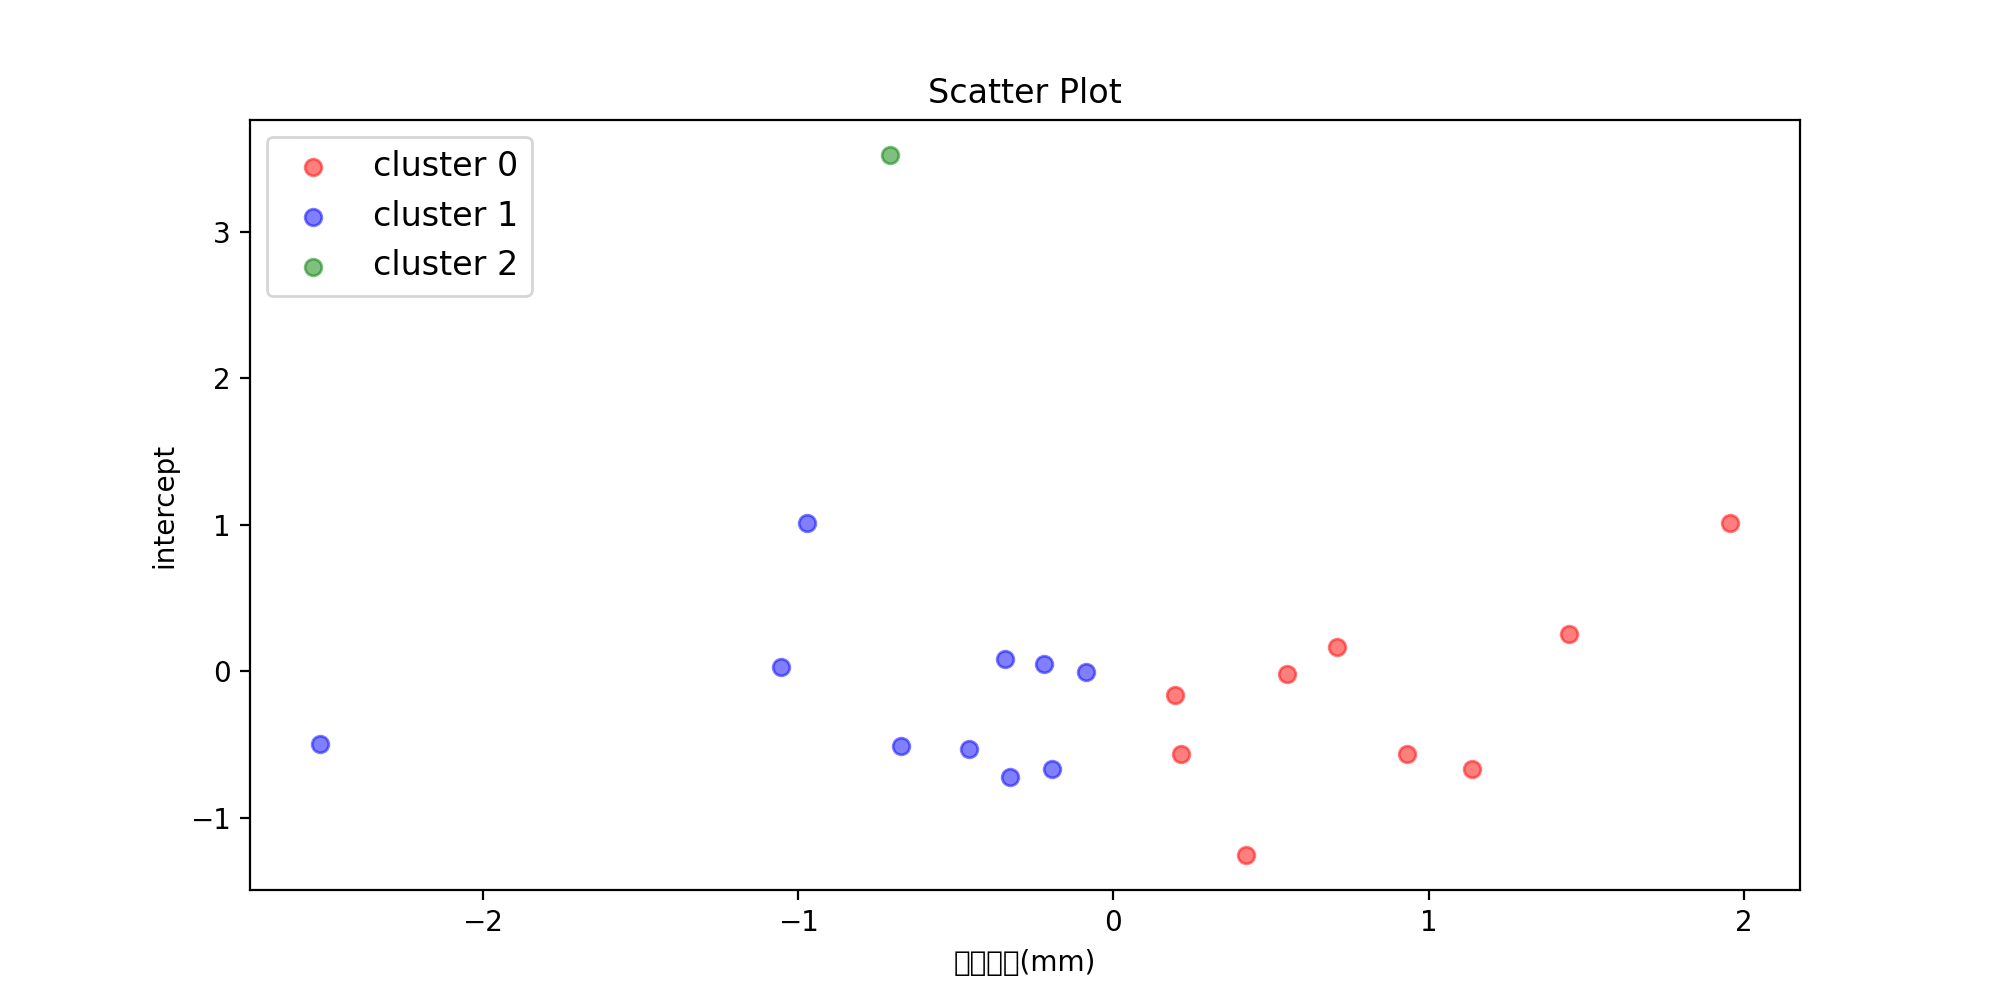

In [95]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
colors = ['Red', 'Blue', 'Green']
 
for t in range(num_clusters):
    x = coef_matrix_cluster5.loc[coef_matrix_cluster5['atm_cluster_id'] == t, '日降水量(mm)']
    y = coef_matrix_cluster5.loc[coef_matrix_cluster5['atm_cluster_id'] == t, 'intercept']
 
    ax.scatter(x, y, alpha=0.5, label='cluster ' + str(t), color=colors[t])
 
ax.set_title('Scatter Plot')
ax.set_xlabel('日降水量(mm)')
ax.set_ylabel('intercept')
 
ax.legend(loc='upper left', fontsize=12)
 
plt.show()

In [109]:
#6回目グルーピング
coef_matrix_cluster6 = coef_matrix2[['intercept' ,'day' ,'week']]
coef_matrix_cluster6

c_array= np.array([
    coef_matrix_cluster6['intercept'].tolist(),
    coef_matrix_cluster6['day'].tolist(),
    coef_matrix_cluster6['week'].tolist()
    ], np.float)

c_array = c_array.T

num_clusters = 3
clf = KMeans(n_clusters = num_clusters ) 
clf.fit(c_array) 
pred = clf.predict(c_array) 

coef_matrix_cluster6['atm_cluster_id'] = pred
coef_matrix_cluster6


,intercept,day,week,atm_cluster_id
87,0.258224,0.005703,-0.750157,1
91,-0.493419,0.603677,-0.855695,1
90,-0.158051,-0.933793,-0.232323,1
96,-0.531243,-0.042620,-0.477428,1
105,0.084841,0.289577,0.291159,1
86,-0.662227,-0.192162,-0.514903,1
102,0.048389,-1.218922,0.648321,0
85,1.015122,-0.114615,1.407843,0
104,0.030573,0.815005,0.016604,1
103,0.164914,-0.233068,-0.073855,1


<IPython.core.display.Javascript object>


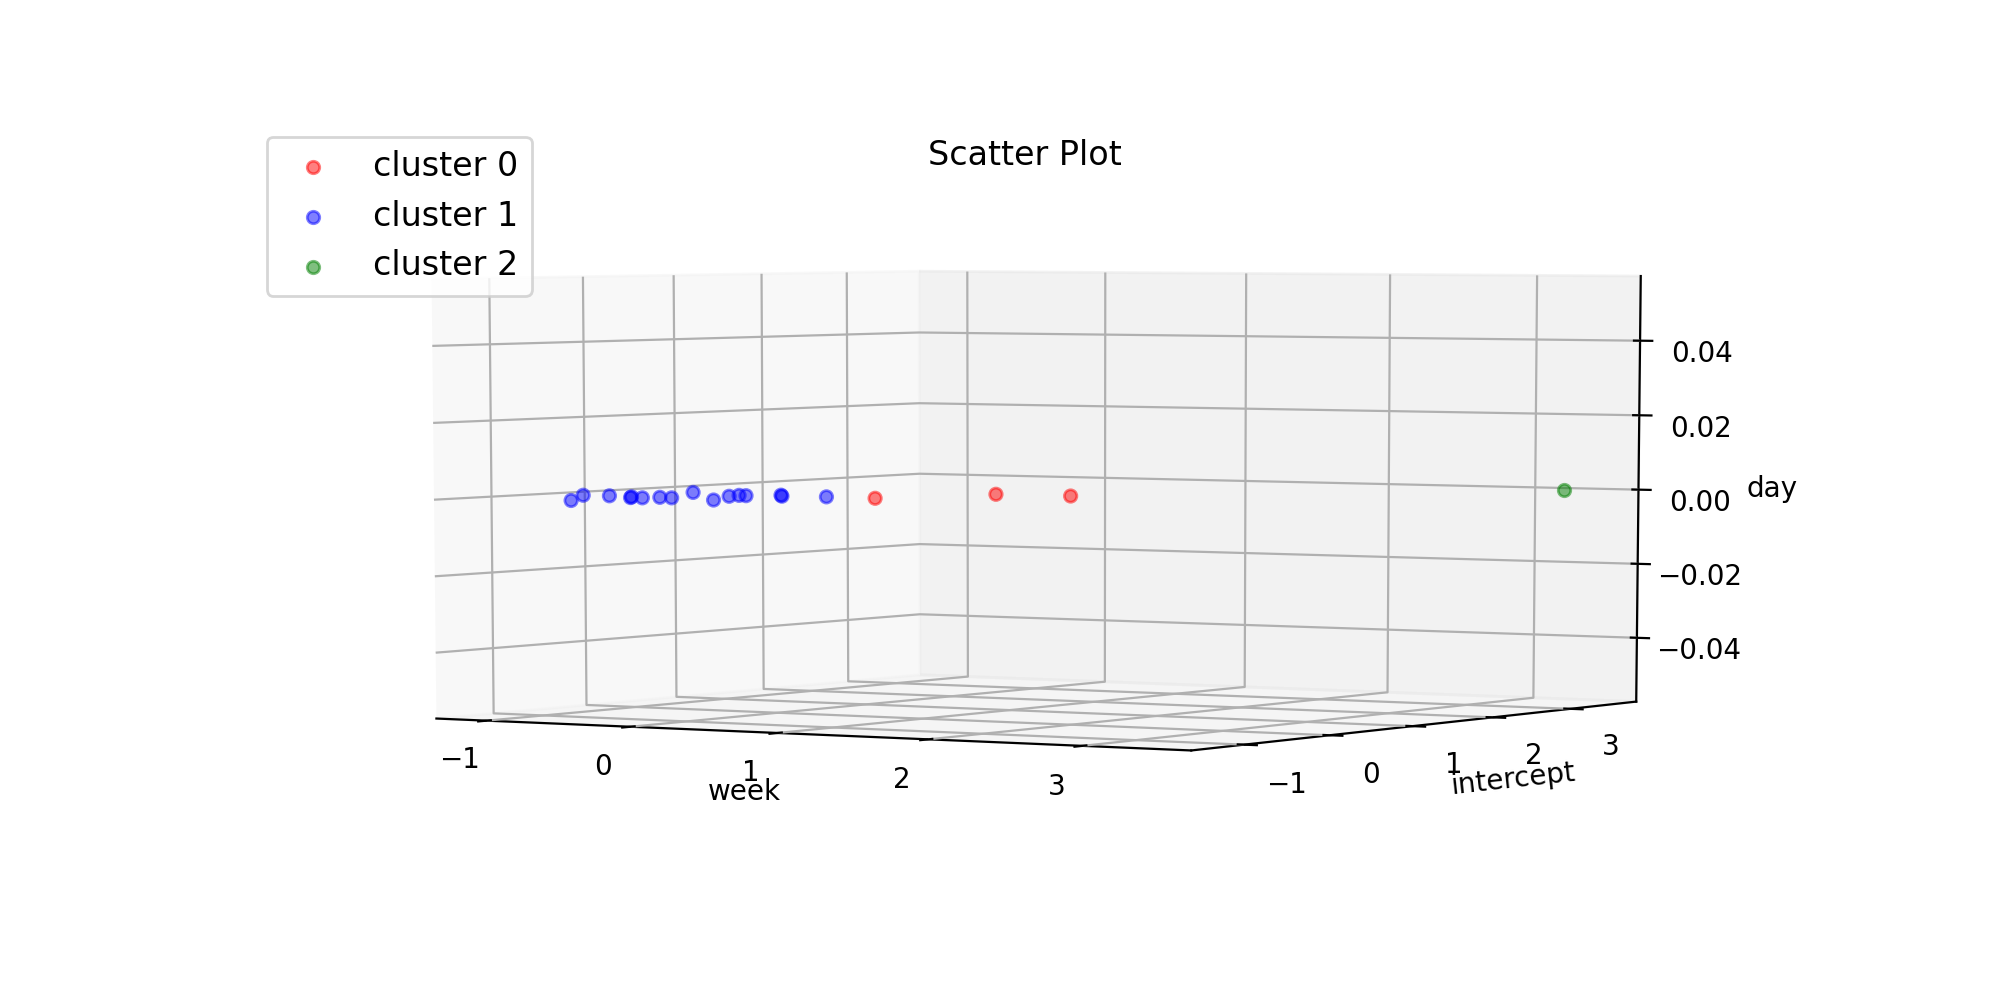

In [111]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
colors = ['Red', 'Blue', 'Green']
 
for t in range(num_clusters):
    x = coef_matrix_cluster6.loc[coef_matrix_cluster6['atm_cluster_id'] == t, 'week']
    y = coef_matrix_cluster6.loc[coef_matrix_cluster6['atm_cluster_id'] == t, 'intercept']
    z = coef_matrix_cluster6.loc[coef_matrix_cluster6['atm_cluster_id'] == t, 'day'] 

    ax.scatter(x, y, alpha=0.5, label='cluster ' + str(t), color=colors[t])
 
ax.set_title('Scatter Plot')
ax.set_xlabel('week')
ax.set_ylabel('intercept')
ax.set_zlabel('day')
 
ax.legend(loc='upper left', fontsize=12)
 
plt.show()